# Data Mining IT326 - Project 
# Group 4  (Airlines Customer satisfaction)

# 1- Problem:

Airline customer satisfaction is a critical factor for airlines' success. in today's competitive market, airlines must constantly strive to improve their customer satisfaction to attract and retain passengers.The dataset provided pertains to Invistico Airlines, an airline organization. It contains customer information, including feedback and flight data from previous passengers. The primary objective of this dataset is to predict the likelihood of satisfaction for potential future customers based on a range of parameter values. Furthermore, the airline aims to identify specific aspects of their services that require greater emphasis to ensure higher levels of customer satisfaction.

# 2- Data mining task:                    

Data mining within the scope of our dataset involves the utilization of advanced analytical techniques to uncover valuable insights and patterns relevant to airline customer satisfaction. The primary goal is to predict the class label that signifies whether a passenger is satisfied or dissatisfied with their airline experience through classification and clustering techniques. By applying data mining algorithms . The predictive aspect of data mining entails constructing predictive models that can categorize passengers into specific classes, such as "Satisfied" or "Not Satisfied," based on their characteristics and the identified influential factors. These models enable airlines to take proactive measures to enhance passenger satisfaction.

# 3- Dataset information:

This extensive dataset, comprising 129,880 rows and 23 columns, is sourced from diverse channels such as surveys, customer reviews, and social media data. It will undergo thorough data mining procedures aimed at uncovering the pivotal factors that influence customer satisfaction. These influential determinants span a broad spectrum, encompassing variables such as service quality, ticket pricing, flight reliability, and more

    Data dictionary:                                   

|Attribute|Description|Type|Possible Values|
|-----|-----|-----|----|
|Satisfaction| whether the client is satisfied or not| Binary |Satisfied - Dissatisfied|
|Gender|the gender of the client| Binary | Female - Male|
|Customer Type|whether the client is loyal or not| Binary |Loyal Customer - Disloyal Customer|
|Age|The age of the customer| Numeric| Between 7 - 85 |
|Type of travel|Purpose of the flight| Binary |Personal travel - Business travel|
|Class|Type of airplane seat | Nominal |Eco - Eco plus - Business|
|Flight Distance|how long is the flight distance| Numeric | From 50 to 6951 
|Seat comfort|is the seat comfortable or not| Ordinal | From 0 to 5 |
|Departure/Arrival time convenient|if the time is convenient | Ordinal | From 0 to 5 |
|Food and drink|what is the quality of the food and drink| Ordinal | From 0 to 5 |
|Gate location|the client's rate about the gate location| Ordinal | From 0 to 5 |
|Inflight WiFi service|the client's rate for this service| Ordinal | From 0 to 5 |
|Inflight entertainment|if the flight contain an entertainment services | Ordinal | From 0 to 5 |
|Online support|the client's rate for this service| Ordinal | From 0 to 5 |
|Ease of Online Booking|the client's rate about the online booking | Ordinal | From 0 to 5 |
|On-board service|the client's rate about the On-board service| Ordinal | From 0 to 5 |
|Leg room service|does the client have a space for his legs| Ordinal | From 0 to 5 |
|Baggage handling|does the flight have this service and how is it| Ordinal | From 0 to 5 |
|Check-In service|the client's rate for this service| Ordinal | From 0 to 5 |
|Cleanliness|how clean is the plane| Ordinal | From 0 to 5 |
|Online boarding|the client's rate for this service| Ordinal | From 0 to 5 |
|Departure Delay in minutes|how many minutes does the Departure delayed| Numeric | From 0 to 1592 |
|Arrival Delay in minutes|how many minutes does the arrival delayed| Numeric | From 0 to 1584 |

In [1]:
data = read.csv("Invistico_Airline.csv")

Because of the overwhelming volume of objects, our computers are unable to efficiently process such a large dataset. As a result, we have opted to randomly delete a portion of the rows

In [2]:
nrow(data)

[1] 129880

In [3]:
# Set a random seed for reproducibility
set.seed(1234)

# Determine the number of rows you want to delete
num_rows_to_delete <- 120000  # Adjust this number as needed

# Generate random row indices to delete
rows_to_delete <- sample(nrow(data), num_rows_to_delete)

# Keep only the rows that are not in the rows_to_delete vector
data <- data[-rows_to_delete, ]
row_count <- nrow(data)
print(row_count)

[1] 9880


In [4]:
library(readr)
library(tidyr)
library(stringr)
library(dplyr)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
install.packages("outliers")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [6]:
library(outliers)

In [7]:
head(data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,⋯,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
23,satisfied,Female,Loyal Customer,25,Personal Travel,Eco,2122,0,1,0,⋯,4,2,4,1,3,1,3,2,0,0
30,satisfied,Female,Loyal Customer,35,Personal Travel,Eco,3695,0,1,0,⋯,4,2,2,3,4,4,3,4,0,0
34,satisfied,Female,Loyal Customer,26,Personal Travel,Eco,2408,0,1,0,⋯,4,4,1,4,4,2,3,4,0,0
37,satisfied,Female,Loyal Customer,10,Personal Travel,Eco,3209,0,1,0,⋯,4,4,4,3,3,1,4,4,0,0
50,satisfied,Male,Loyal Customer,34,Personal Travel,Eco,1816,0,1,0,⋯,4,4,1,1,2,3,2,4,0,0
64,satisfied,Female,Loyal Customer,11,Personal Travel,Eco,1761,0,1,0,⋯,3,3,1,2,3,2,3,3,0,0


In [8]:
print(data)

      satisfaction Gender     Customer.Type Age  Type.of.Travel    Class
23       satisfied Female    Loyal Customer  25 Personal Travel      Eco
30       satisfied Female    Loyal Customer  35 Personal Travel      Eco
34       satisfied Female    Loyal Customer  26 Personal Travel      Eco
37       satisfied Female    Loyal Customer  10 Personal Travel      Eco
50       satisfied   Male    Loyal Customer  34 Personal Travel      Eco
64       satisfied Female    Loyal Customer  11 Personal Travel      Eco
87       satisfied Female    Loyal Customer   9 Personal Travel      Eco
92       satisfied Female    Loyal Customer  33 Personal Travel      Eco
94       satisfied Female    Loyal Customer  23 Personal Travel Eco Plus
115      satisfied Female    Loyal Customer   9 Personal Travel      Eco
125      satisfied Female    Loyal Customer  32 Personal Travel      Eco
134      satisfied Female    Loyal Customer  64 Personal Travel      Eco
135      satisfied Female    Loyal Customer  37 Per

In [9]:
summary(data)

 satisfaction          Gender          Customer.Type           Age       
 Length:9880        Length:9880        Length:9880        Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :39.00  
                                                          Mean   :39.26  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
                                                                         
 Type.of.Travel        Class           Flight.Distance  Seat.comfort  
 Length:9880        Length:9880        Min.   :  50    Min.   :0.000  
 Class :character   Class :character   1st Qu.:1370    1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :1939    Median :3.000  
                                       Mean   :1999    Mean   :2.838  
                                       3rd Qu.:2560  

# 4-Graph representations:

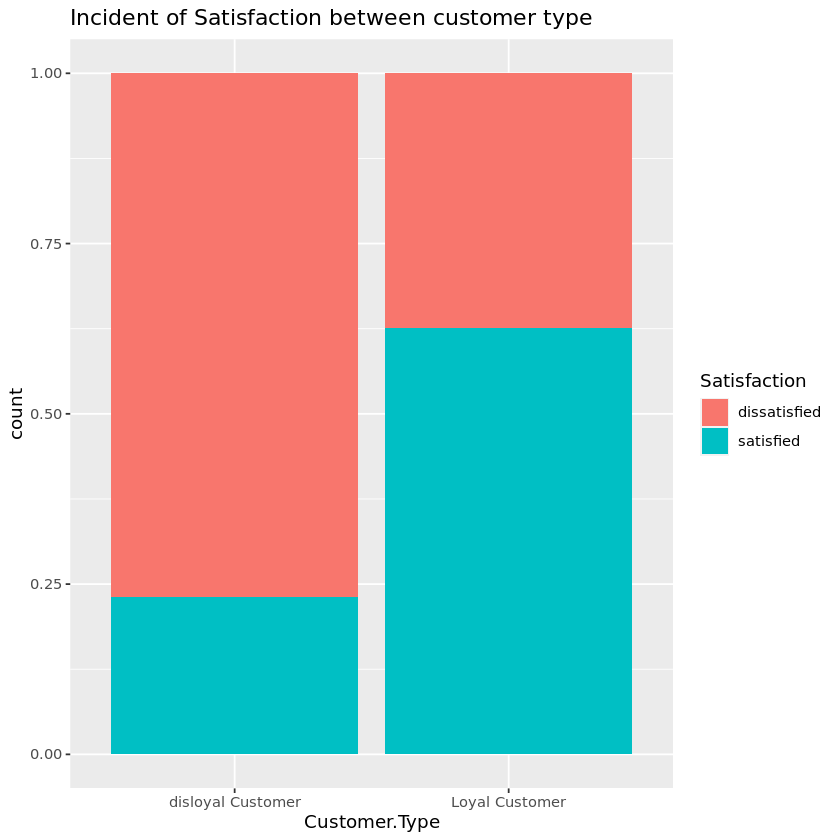

In [10]:
ggplot(data, aes(x = Customer.Type, fill = as.factor(satisfaction))) +
  geom_bar(position = "fill") +
  labs(fill = "Satisfaction", title= "Incident of Satisfaction between customer type")


The bar graph depicts the relationship between customer satisfaction and customer type. Our research reveals that loyal customers generally display higher levels of satisfaction in comparison to their disloyal counterparts.

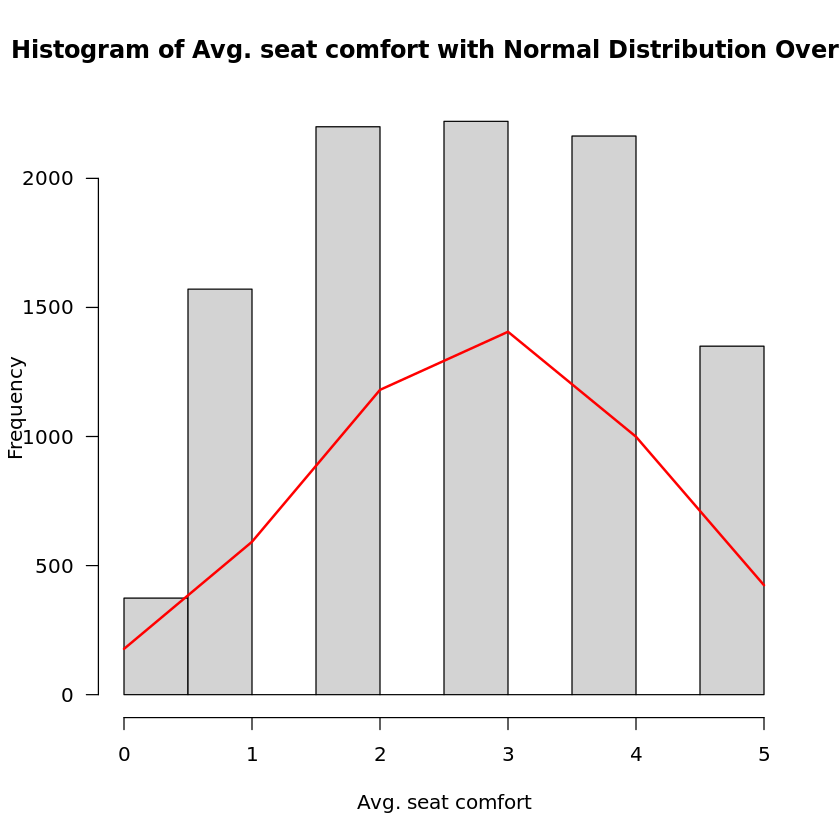

In [11]:
histglucose <- hist(data$Seat.comfort,xlim=c(0,5),
main="Histogram of Avg. seat comfort with Normal Distribution Overlay", xlab="Avg. seat comfort",las=1)
    xfit <- seq(min(data$Seat.comfort),max(data$Seat.comfort))
    yfit <- dnorm(xfit,mean=mean(data$Seat.comfort),sd=sd(data$Seat.comfort))
    yfit <- yfit*diff(histglucose$mids[1:2])*length(data$Seat.comfort)
    lines(xfit,yfit,col="red",lwd=2)

This histogram shows us the average of the seat comfort rating, and from the graph above we can see it's a left skewed, this show us the mean in this column is typically less than the median. Also, we can see the frequency start to increase when the rating reach 3.

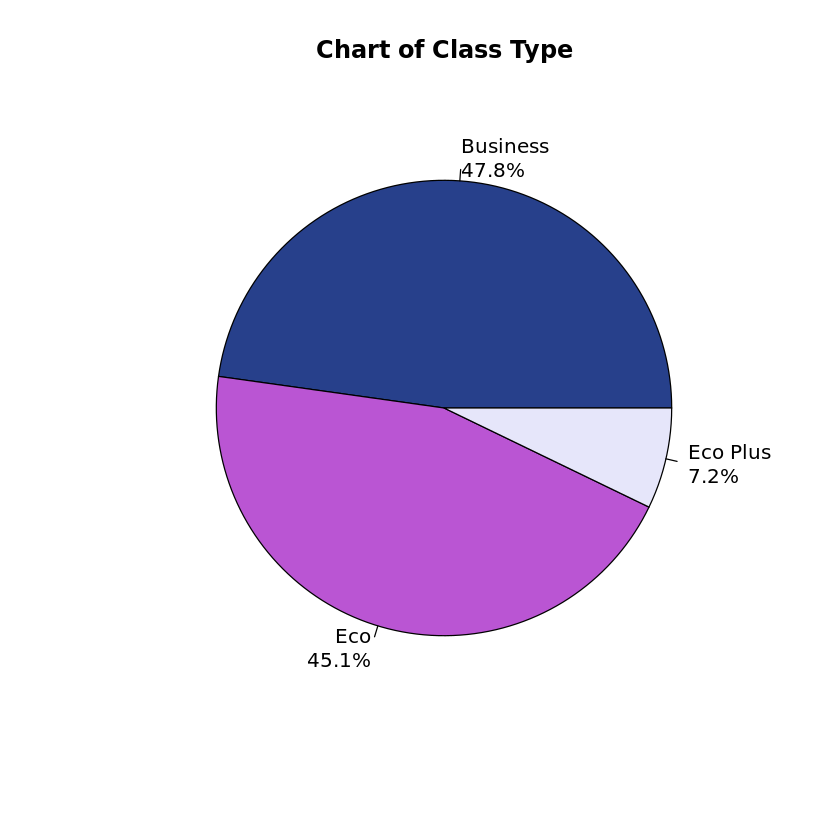

In [12]:
tab <- data$Class %>% table()
precentages <- tab %>% prop.table() %>% round(3) * 100 
txt <- paste0(names(tab), '\n', precentages, '%') # text on chart
colors <- c("royalblue4", "mediumorchid", "lavender")
pie(tab, labels=txt ,col = colors, main= "Chart of Class Type") # plot pie chart

This pie chart displays the distribution of passenger classes in our dataset, which is categorized as nominal data. The data reveals that Business Class passengers constitute the highest proportion at 47.8%, followed by Economy Class passengers at 45.1%, while the smallest percentage corresponds to Eco Plus Class passengers, accounting for 7.2% of the total.

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



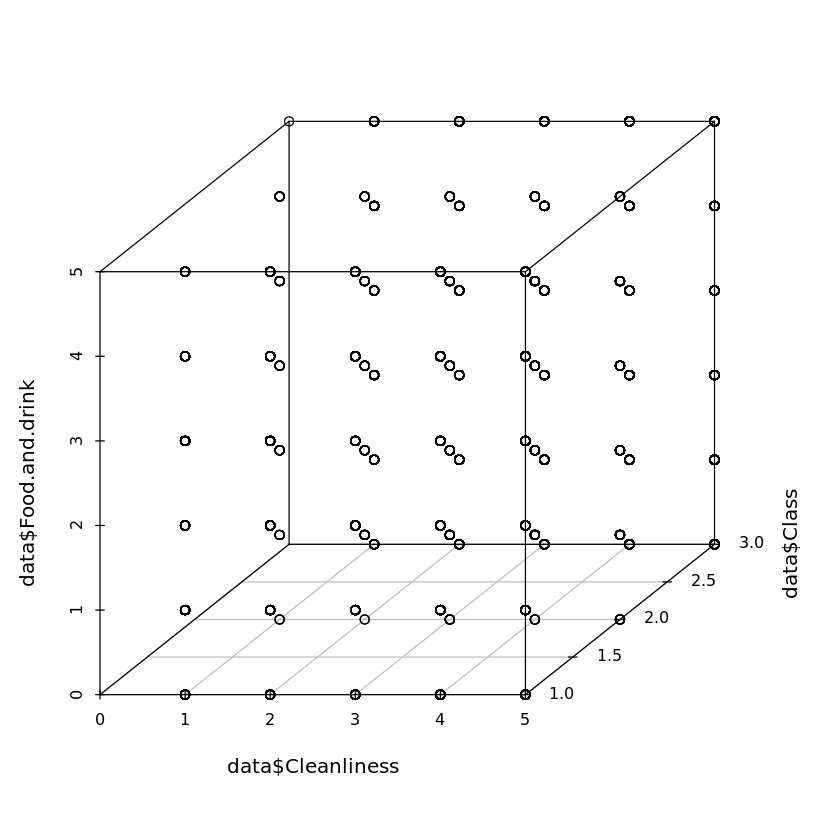

In [62]:
install.packages("scatterplot3d")
library(scatterplot3d)
scatterplot3d(data$Cleanliness, data$Class, data$Food.and.drink)

a scatter plot consists of individual data points. 

# 5- Data preprocessing

# 5.1 -Data Cleaning :

Missing data can introduce challenges during data analysis or the construction of machine learning models since they have the potential to yield inaccurate results or generate errors. In our dataset, we proactively identified and addressed missing data by opting to replace those missing values with the mean.

In [13]:
#looking for missing data and datatypes for all feature
sum(is.na(data))

[1] 26

In [14]:
#looking for missing data and datatypes for each feature
sapply(data, function(x) sum(is.na(x)))

satisfaction                            Gender 
                                0                                 0 
                    Customer.Type                               Age 
                                0                                 0 
                   Type.of.Travel                             Class 
                                0                                 0 
                  Flight.Distance                      Seat.comfort 
                                0                                 0 
Departure.Arrival.time.convenient                    Food.and.drink 
                                0                                 0 
                    Gate.location             Inflight.wifi.service 
                                0                                 0 
           Inflight.entertainment                    Online.support 
                                0                                 0 
           Ease.of.Online.booking                  On.board.service 
                                0                                 0 
                 Leg.room.service                  Baggage.handling 
                                0                                 0 
                  Checkin.service                       Cleanliness 
                                0                                 0 
                  Online.boarding        Departure.Delay.in.Minutes 
                                0                                 0 
         Arrival.Delay.in.Minutes 
                               26

In [15]:
#handle the missing value by replacing it with the mean
data$Arrival.Delay.in.Minutes<- ifelse(
  is.na(data$Arrival.Delay.in.Minutes),
  round(mean(data$Arrival.Delay.in.Minutes, na.rm = TRUE)),
  data$Arrival.Delay.in.Minutes
)

In [16]:
#the result after we handle it
sum(is.na(data$Arrival.Delay.in.Minutes))

[1] 0

# 5.2 -Remove outliers :

We looked at our data and found some unusual values that don't fit in well with the rest. These odd values, called outliers, So, we needed to get rid of them before we started working on our project.

To do that, we used a tool called the Outliers package, which has a function called Outlier(). It helped us find and highlight the outlier data points in our dataset.

In [17]:
#find the outlier in Arrival Delay in Minutes
OutAM <- outlier(data$Arrival.Delay.in.Minutes)
print(OutAM)

[1] 822


In [18]:
#Remove Arrival.Delay.in.Minutes outlier
data <- data[data$Arrival.Delay.in.Minutes != OutAM, ]

In [19]:
#find the outlier in Flight Distance
OutFD <- outlier(data$Flight.Distance)
print(OutFD)

[1] 6907


In [20]:
#Remove Flight.Distance outlier
data <- data[data$Flight.Distance!= OutFD, ]

In [21]:
#find the outlier in Departure Delay in Minutes
OutDM <- outlier(data$Departure.Delay.in.Minutes)
print(OutDM)

[1] 581


In [22]:
#Remove Departure.Delay.in.Minutes outlier
data <- data[data$Departure.Delay.in.Minutes!= OutDM, ]

In [23]:
#find the outlier in Age
OutAG <- outlier(data$Age)
print(OutAG)

[1] 85


In [24]:
#Remove Age outlier
data <- data[data$Age!= OutAG, ]

# 5.3 - Data Transformation

5.3.1-Encoding

Encoding is crucial in data mining and machine learning because it changes raw data into a format algorithms can understand. This often means turning categories or words into numbers, making it easier for computers to work with and analyze the information.

In [25]:
# Replace 'Gender' column with 1(female) or 2(male)
data$Gender <- as.integer(factor(data$Gender, levels = unique(data$Gender)))

In [26]:
# Replace 'Customer Type' column with 1(loyal Customer) or 2(disloyal Customer) 
data$Customer.Type<- as.integer(factor(data$Customer.Type, levels = unique(data$Customer.Type)))

In [27]:
# Replace 'Type of Travel' column with 1(Personal Travel) or 2(Business travel)
data$Type.of.Travel<- as.integer(factor(data$Type.of.Travel, levels = unique(data$Type.of.Travel)))


In [28]:
# Replace 'Class' column with 1(Eco), 2(Business) or 3(Eco Plus)
data$Class <- as.integer(factor(data$Class, levels = unique(data$Class)))

In [29]:
# Define a dictionary to manually recode 'satisfied' to 1 and 'dissatisfied' to 0
dictionary <- c('dissatisfied' = 0, 'satisfied' = 1)

In [30]:
# Replace values in 'Satisfaction' column using the dictionary
data <- data %>% mutate(satisfaction = recode(satisfaction, !!!dictionary))

In [31]:
head(data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,⋯,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
23,1,1,1,25,1,1,2122,0,1,0,⋯,4,2,4,1,3,1,3,2,0,0
30,1,1,1,35,1,1,3695,0,1,0,⋯,4,2,2,3,4,4,3,4,0,0
34,1,1,1,26,1,1,2408,0,1,0,⋯,4,4,1,4,4,2,3,4,0,0
37,1,1,1,10,1,1,3209,0,1,0,⋯,4,4,4,3,3,1,4,4,0,0
50,1,2,1,34,1,1,1816,0,1,0,⋯,4,4,1,1,2,3,2,4,0,0
64,1,1,1,11,1,1,1761,0,1,0,⋯,3,3,1,2,3,2,3,3,0,0


5.3.2 - Discretization

We have categorized flight distances into four finite elements: 0, 1400, 2800, 4200,  7000 and, inf. Into the showing labels 1 as short , 2 as medium, 3 as moderate, 4 as long , and 5 as very long ,This allows for detailed analysis and insights into various aspects of air travel.

In [32]:
#Assuming 'data' is your data frame and 'Flight.Distance' is the column to be discretized

# Define the bin edges and labels
bin.edges <- c(0, 1400, 2800, 4200, 7000, Inf)  # Modify these bins as needed
bin.labels <- c(1, 2, 3, 4, 5)

# Perform discretization using cut() function
data$Flight.Distance<- cut(data$Flight.Distance, breaks = bin.edges, labels = bin.labels)

# Now, the 'Flight Distance' column has been discretized into categories and stored in 'Flight.Distance.Category

In [33]:
print(data$Flight.Distance)

   [1] 2 3 2 3 2 2 2 3 2 2 2 1 2 2 2 2 2 1 1 2 2 2 3 2 2 2 1 1 2 3 1 3 2 1 2 2 2
  [38] 1 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 3 2 1 1 1 2 1 3 2 2 1 2 3 3 1 1 2 2 1 1
  [75] 2 3 2 2 2 1 2 1 2 2 2 3 3 3 2 2 2 2 1 1 2 3 2 3 2 2 1 2 2 2 2 1 2 1 1 1 1
 [112] 1 2 1 2 2 2 1 1 2 2 2 2 1 3 2 2 2 2 2 2 2 2 2 1 2 1 2 3 3 3 2 2 3 1 2 2 2
 [149] 1 2 2 2 2 2 2 2 2 2 1 1 2 3 2 2 3 1 2 2 2 2 2 2 1 2 2 1 1 2 2 1 1 1 3 2 2
 [186] 2 1 2 2 1 1 2 2 2 1 1 2 2 3 3 3 2 2 2 2 1 1 2 2 2 1 2 2 2 1 1 1 2 2 3 3 2
 [223] 2 3 1 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 1 3 2 1 2 2 3 2 2 1 1 2 3 2 1 2 3 1 2
 [260] 2 1 2 1 2 1 2 2 2 1 2 1 2 3 2 2 2 1 1 2 2 1 2 2 1 2 2 2 1 2 1 1 1 1 2 2 2
 [297] 2 3 3 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 1 2 1 1 2 1 1 2 1 2 3 3 3 1
 [334] 3 1 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 2 1 2 1 2 1 2
 [371] 2 1 1 1 2 1 3 2 3 2 2 3 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 1 2 1 2 1 1 2
 [408] 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 3 2 2 1 2 2 2 2 2 1 2 1 1 2 2 2 1 2 1 2 1 2
 [445] 2 2 2 2 1 1 1 1 2 2 2

5.3.3 - Normalization Min-Max Scaling :

We used a technique called max-min normalization to make sure our data was consistently scaled. This method adjusts the values of certain attributes to fit within a range from 0 to 1. We applied this normalization to three specific attributes: age, Arrival Delay in Minutes, and Departure Delay in Minutes. Normalizing the dataset in this way makes the attributes more uniform and comparable, which helps us perform accurate analysis and modeling for predicting satisfaction, as demonstrated in the results.

In [34]:
normalize <- function(x) { return ((x - min(x))/ (max(x)- min(x)))   }

In [35]:
data$Age=normalize(data$Age)

In [36]:
data$Arrival.Delay.in.Minutes=normalize(data$Arrival.Delay.in.Minutes)

In [37]:
data$Departure.Delay.in.Minutes=normalize(data$Departure.Delay.in.Minutes)

In [38]:
head(data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,⋯,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
23,1,1,1,0.24657534,1,1,2,0,1,0,⋯,4,2,4,1,3,1,3,2,0,0
30,1,1,1,0.38356164,1,1,3,0,1,0,⋯,4,2,2,3,4,4,3,4,0,0
34,1,1,1,0.26027397,1,1,2,0,1,0,⋯,4,4,1,4,4,2,3,4,0,0
37,1,1,1,0.04109589,1,1,3,0,1,0,⋯,4,4,4,3,3,1,4,4,0,0
50,1,2,1,0.36986301,1,1,2,0,1,0,⋯,4,4,1,1,2,3,2,4,0,0
64,1,1,1,0.05479452,1,1,2,0,1,0,⋯,3,3,1,2,3,2,3,3,0,0


# 6 - Feature selection :

To simplify our predictive model, we'll use a feature selection technique known as Recursive Feature Elimination (RFE). This method is commonly used to pick out the most important input variables for predicting our target variable, which in our case is "satisfaction." Additionally, we'll utilize the varImp function, which helps us assess the importance of different variables in our analysis.

In [39]:
install.packages("mlbench")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [40]:
install.packages("caret")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [41]:
install.packages("randomForest")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [42]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:outliers’:

    outlier


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




Loading required package: lattice



                     satisfaction            Inflight.entertainment 
                       2936.58499                         555.70793 
                     Seat.comfort            Ease.of.Online.booking 
                        232.46321                         217.84534 
                   Online.support                     Customer.Type 
                        165.16426                         100.34501 
                 On.board.service                   Online.boarding 
                         92.20038                          76.36363 
                            Class                  Leg.room.service 
                         76.07383                          71.11721 
                   Food.and.drink                            Gender 
                         64.07204                          48.35584 
                      Cleanliness                  Baggage.handling 
                         35.24962                          33.75700 
                   Type.of.Travel 

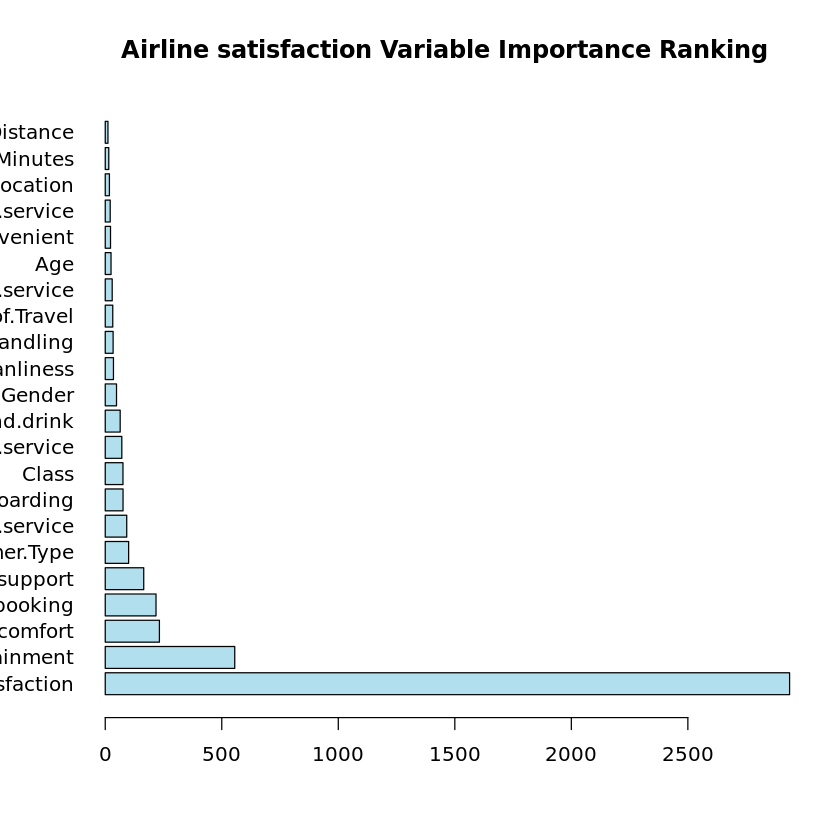

In [43]:
# ensure the results are repeatable
set.seed(7)
# load the library
library(mlbench)
library(caret)
# Convert the class label to a factor

data$satisfaction <- as.factor(data$satisfaction)



# Separate the predictors and the class label

predictors <- data[, -23]  # Excluding the class label (satisfaction)
class_label <- data$satisfaction


# Train a Random Forest model

model <- randomForest(predictors, class_label, importance = TRUE)



# Get the variable importance

importance <- importance(model)

ranked_features <- sort(importance[, "MeanDecreaseGini"], decreasing = TRUE)



# Print the ranked features
print(ranked_features)

barplot(ranked_features, horiz = TRUE, col = c("lightblue2"), las = 1, main = "Airline satisfaction Variable Importance Ranking")

After we do the feature selection we notice that the least importante attribute are (Flight.Distance, Departure.Delay.in.Minutes, Gate location) Therefore, we will remove them

In [44]:
#delete the coloumns
data <-data[,!names(data) %in% c("Flight.Distance", "Gate.location", "Departure.Delay.in.Minutes")]

Finally an overall head for our dataset

In [45]:
head(data)

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,Inflight.wifi.service,Inflight.entertainment,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Arrival.Delay.in.Minutes
,<fct>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
23,1,1,1,0.24657534,1,1,0,1,0,2,0,4,2,4,1,3,1,3,2,0
30,1,1,1,0.38356164,1,1,0,1,0,0,4,4,2,2,3,4,4,3,4,0
34,1,1,1,0.26027397,1,1,0,1,0,4,0,4,4,1,4,4,2,3,4,0
37,1,1,1,0.04109589,1,1,0,1,0,4,0,4,4,4,3,3,1,4,4,0
50,1,2,1,0.36986301,1,1,0,1,0,4,0,4,4,1,1,2,3,2,4,0
64,1,1,1,0.05479452,1,1,0,1,0,3,0,3,3,1,2,3,2,3,3,0


# imbalanced dataset problem:

Addressing imbalanced data is pivotal for constructing machine learning models that are both effective and fair. A strategic amalgamation of resampling techniques, judicious algorithm selection, and meticulous evaluation metrics can notably enhance model performance on imbalanced datasets. In this context, we chosen method involves oversampling to balance our dataset , which entails augmenting the number of instances in the class to rectify the class imbalance. This approach aims to bolster the model's ability to adequately capture and learn from the underrepresented class, thereby fostering a more balanced and robust predictive outcome.

In [46]:
install.packages("ROSE")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)




  0   1 
0.5 0.5 

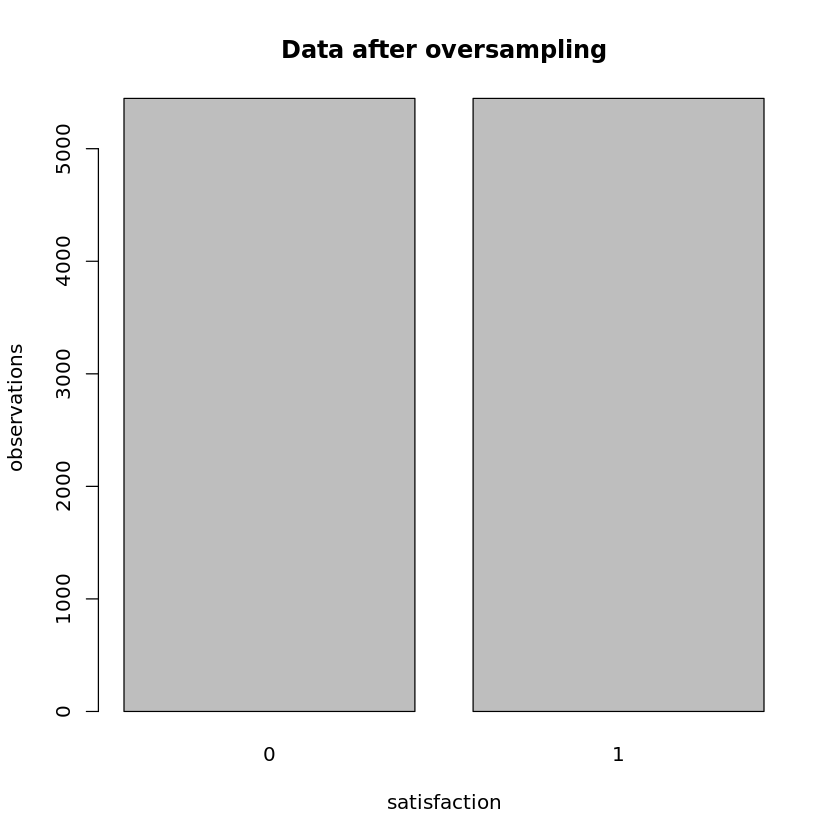

In [47]:
# upscaling the data
data<-upSample(data[,-1],data$satisfaction, yname="satisfaction")
plot(data$satisfaction)

# checking the number of stroke/ non-stroke observations
prop.table(table(data$satisfaction))
title(main="Data after oversampling", xlab="satisfaction", ylab="observations")

In [48]:
#Number of rows
nrow(data)

[1] 10894

delete random rows

In [49]:
# Set a random seed for reproducibility
set.seed(1234)

# Determine the number of rows you want to delete
num_rows_to_delete <- 5000  # Adjust this number as needed

# Generate random row indices to delete
rows_to_delete <- sample(nrow(data), num_rows_to_delete)

# Keep only the rows that are not in the rows_to_delete vector
data <- data[-rows_to_delete, ]
row_count <- nrow(data)
print(row_count)

[1] 5894


In [50]:
install.packages("openxlsx")  # Install the openxlsx package if you haven't already
library(openxlsx)

write.xlsx(data, file = "ProjectG4.xlsx", row.names = FALSE)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Warning message:
“Please use 'rowNames' instead of 'row.names'”


In [51]:
head(data)

,Gender,Customer.Type,Age,Type.of.Travel,Class,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,Inflight.wifi.service,Inflight.entertainment,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Arrival.Delay.in.Minutes,satisfaction
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,2,1,0.71232877,1,2,1,0,1,1,4,3,2,5,3,3,3,2,3,0.483974359,0
2,2,1,0.24657534,1,1,1,0,1,4,1,4,4,1,2,3,5,1,4,0.198717949,0
3,2,1,0.67123288,1,3,1,0,1,4,4,5,3,3,1,3,3,3,4,0.003205128,0
4,2,1,0.32876712,1,1,1,0,1,2,1,2,2,4,1,4,5,5,2,0.000000000,0
6,2,1,0.67123288,1,1,1,0,1,2,1,4,2,5,4,5,5,4,2,0.000000000,0
7,2,1,0.09589041,1,1,1,0,1,4,1,4,4,1,3,3,1,1,4,0.000000000,0


# 7 - Data Mining Technique :


Data mining plays a pivotal role in forecasting satisfaction probabilities through the application of classification and clustering techniques. When data mining algorithms are applied to a vast dataset encompassing diverse features, it unveil valuable patterns and relationships. 

In the realm of classification, data mining becomes instrumental in constructing models capable of precisely categorizing individuals. For instance, assigning individuals a label of 1 for "satisfaction" or 0 for "non-satisfied" based on their attributes. This aids in pinpointing those who are satisfied 

Conversely, clustering techniques play a crucial role in identifying groups or clusters of individuals who share similar characteristics. This deeper understanding, facilitated by clustering, contributes to a more comprehensive analysis of satisfaction dynamics. By harnessing the power of data mining in satisfaction prediction, we can unravel intricate patterns and glean insights that inform our understanding of individual experiences.

# 7.1 - Classification :


In the classification phase, post-balancing our dataset, we employ a classification algorithm to categorize each data point into predefined classes based on its attributes. The pertinent features, having undergone cleaning and formatting in the preprocessing stage, are selected for this purpose. The chosen model is subsequently trained on the prepared data, enabling it to predict the category of new, unseen data accurately. using information gain , Gini index,Gain ratio This pivotal step lays the foundation for making informed decisions or predictions based on our dataset.

# 7.1.1 - information gain :

Information Gain plays a vital role in decision tree algorithms by identifying the most informative features for dataset splitting. This process involves evaluating multiple potential splits, enabling decision trees to effectively partition data. As a result, decision trees become powerful tools for classification tasks. 

# First split :

To ensure reproducibility, we set a seed, then split our dataset into training (70%) and test (30%) sets using the holdout method. We use the ctree function from the party package, which employs information gain (ID) as a criterion for splitting.

In [55]:
install.packages('ipred')
library(ipred) 
install.packages('rpart')
install.packages('rpart.plot')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [56]:

library(rpart)
library(rpart.plot)
install.packages("caTools")
library(caTools)
set.seed(123)
 
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.70)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



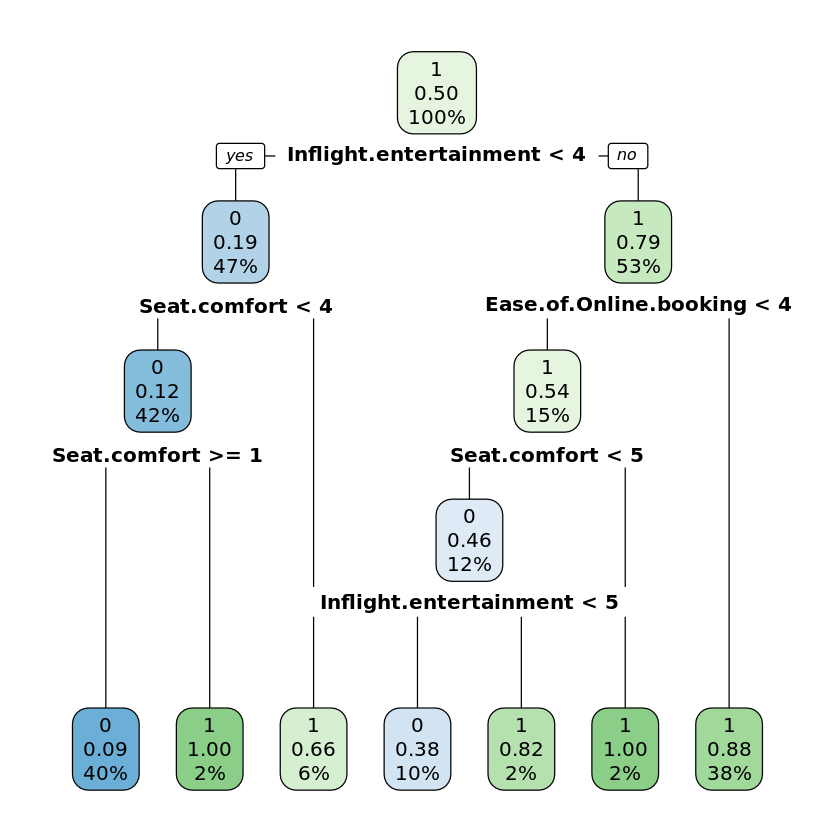

In [57]:
tree <- rpart(satisfaction ~ ., data = training_set,method = 'class', parms= list(split="information"))
rpart.plot(tree)

In [70]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
      0   1
  0 744 134
  1 127 763

[1] "Accuracy on test data is  0.85237556561086"


In [71]:
library(caret)

# Calculate confusion matrix
cm <- confusionMatrix(prediction, test_set$satisfaction)

# Extract metrics using the confusion matrix
sensitivity <- cm$byClass['Sensitivity']
specificity <- cm$byClass['Specificity']
precision <- cm$byClass['Pos Pred Value']

# Print results
print(paste('Sensitivity (True Positive Rate): ', sensitivity))
print(paste('Specificity (True Negative Rate): ', specificity))
print(paste('Precision (Positive Predictive Value): ', precision))

[1] "Sensitivity (True Positive Rate):  0.847380410022779"
[1] "Specificity (True Negative Rate):  0.857303370786517"
[1] "Precision (Positive Predictive Value):  0.854190585533869"


# Second split:

To ensure reproducibility, we set a seed, then split our dataset into training (60%) and test (40%) sets using the holdout method. We use the ctree function from the party package, which employs information gain (ID) as a criterion for splitting.

In [72]:
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.60)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

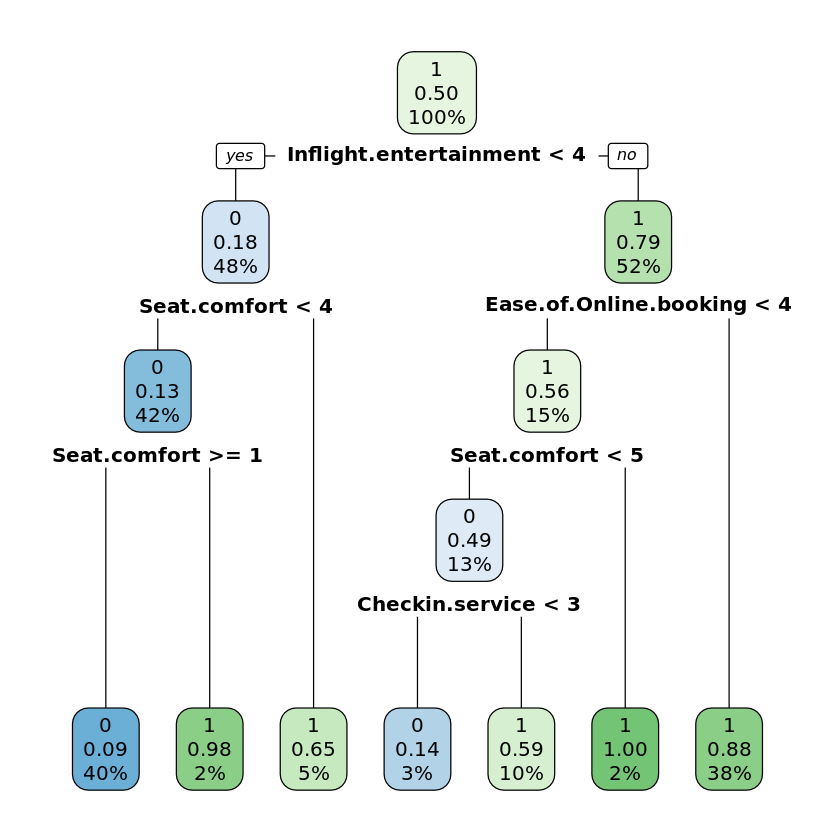

In [73]:
tree <- rpart(satisfaction ~ ., data = training_set,method = 'class', parms= list(split="information"))
rpart.plot(tree)

In [74]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
       0    1
  0  911  259
  1   87 1100

[1] "Accuracy on test data is  0.853203224437845"


In [75]:
library(caret)

# Calculate confusion matrix
cm <- confusionMatrix(prediction, test_set$satisfaction)

# Extract metrics using the confusion matrix
sensitivity <- cm$byClass['Sensitivity']
specificity <- cm$byClass['Specificity']
precision <- cm$byClass['Pos Pred Value']

# Print results
print(paste('Sensitivity (True Positive Rate): ', sensitivity))
print(paste('Specificity (True Negative Rate): ', specificity))
print(paste('Precision (Positive Predictive Value): ', precision))

[1] "Sensitivity (True Positive Rate):  0.778632478632479"
[1] "Specificity (True Negative Rate):  0.92670598146588"
[1] "Precision (Positive Predictive Value):  0.912825651302605"


# Third split :

To ensure reproducibility, we set a seed, then split our dataset into training (85%) and test (15%) sets using the holdout method. We use the ctree function from the party package, which employs information gain (ID) as a criterion for splitting.

In [76]:
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.85)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

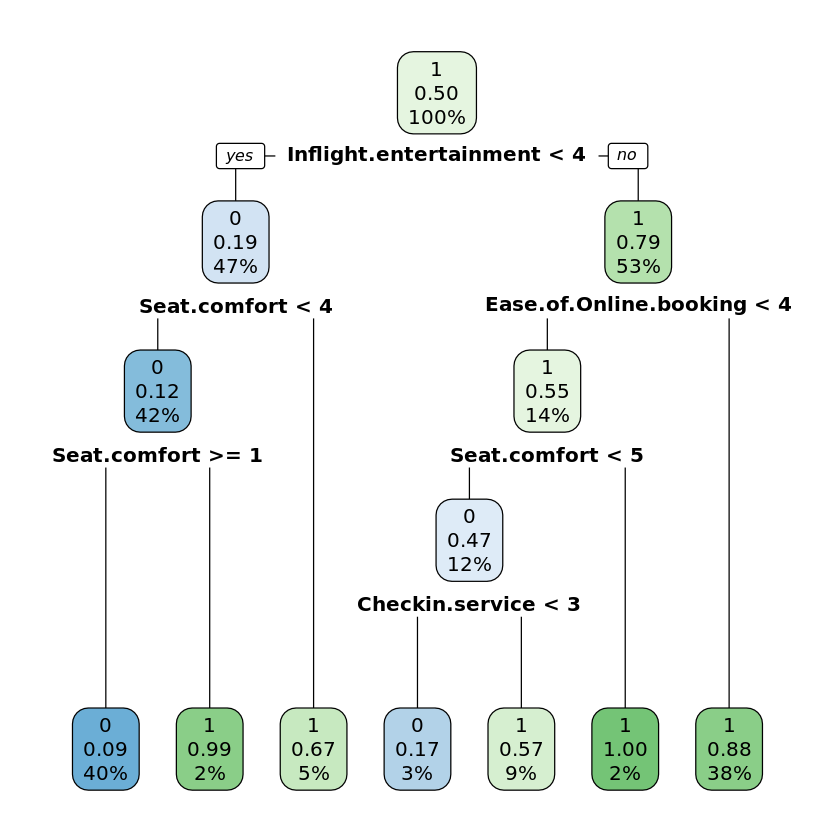

In [77]:
tree <- rpart(satisfaction ~ ., data = training_set,method = 'class', parms= list(split="information"))
rpart.plot(tree)

In [78]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
      0   1
  0 339 100
  1  31 414

[1] "Accuracy on test data is  0.851809954751131"


In [79]:
library(caret)

# Calculate confusion matrix
cm <- confusionMatrix(prediction, test_set$satisfaction)

# Extract metrics using the confusion matrix
sensitivity <- cm$byClass['Sensitivity']
specificity <- cm$byClass['Specificity']
precision <- cm$byClass['Pos Pred Value']

# Print results
print(paste('Sensitivity (True Positive Rate): ', sensitivity))
print(paste('Specificity (True Negative Rate): ', specificity))
print(paste('Precision (Positive Predictive Value): ', precision))

[1] "Sensitivity (True Positive Rate):  0.772209567198178"
[1] "Specificity (True Negative Rate):  0.930337078651685"
[1] "Precision (Positive Predictive Value):  0.916216216216216"


# 7.1.2 - Analysis :

| |training (70%) and test (30%)|training (60%) and test (40%)|training (85%) and test (15%)|
|-----|-----|-----|-----|
|Accuracy|0.852|0.853|0.851|
|Precision|0.854|0.912|0.916
|sensitivity|0.847|0.778|0.772|
|specificity|0.857|0.926|0.930|

Upon analyzing the provided metrics for different training and test splits, several key observations emerge. Firstly, the accuracies across all three scenarios are closely aligned, signifying a consistent overall performance of the model. Secondly, the split with 60% training and 40% test stands out with the highest precision (0.912). This underscores the model's proficiency in correctly identifying positive cases, showcasing a high ratio of accurate positive predictions relative to the total predicted positives.

Additionally, the split with 85% training and 15% test boasts the highest sensitivity (0.772). This outcome highlights the model's enhanced capability to capture a larger proportion of relevant positive instances. Moreover, in the same split, the model exhibits the highest specificity (0.930), underscoring its superior accuracy in correctly identifying negative cases.

In summary, while the accuracies remain consistent, the 60-40 split excels in precision, emphasizing its strength in positive predictions. On the other hand, the 85-15 split outperforms in sensitivity and specificity, showcasing a heightened ability to capture positive instances and accurately identify negative cases.

# 7.1.3- Gini index

The Gini Index is another criterion used in decision tree algorithms for evaluating the impurity of a dataset. It is a measure of how often a randomly chosen element would be incorrectly classified in a dataset.

# First split :

split our dataset into training (70%) and test (30%)

In [81]:
set.seed(123)
 
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.70)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

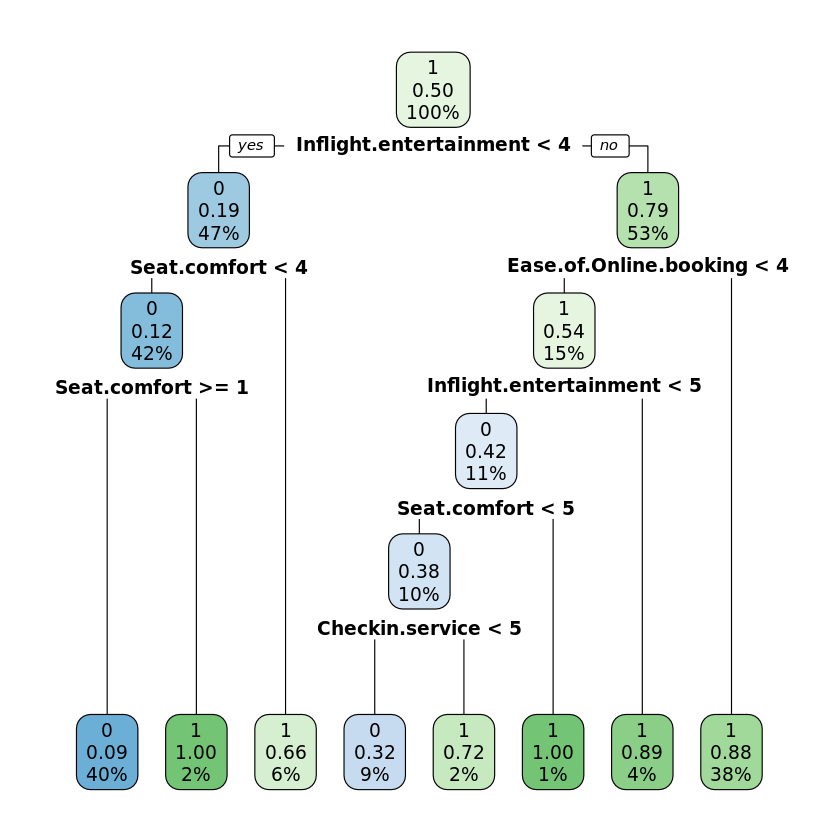

In [82]:

tree <- rpart(satisfaction ~ ., data = training_set,method = 'class')
rpart.plot(tree)

In [83]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
      0   1
  0 736 142
  1 110 780

[1] "Accuracy on test data is  0.857466063348416"


In [84]:
library(caret)

# Calculate confusion matrix
cm <- confusionMatrix(prediction, test_set$satisfaction)

# Extract metrics using the confusion matrix
sensitivity <- cm$byClass['Sensitivity']
specificity <- cm$byClass['Specificity']
precision <- cm$byClass['Pos Pred Value']

# Print results
print(paste('Sensitivity (True Positive Rate): ', sensitivity))
print(paste('Specificity (True Negative Rate): ', specificity))
print(paste('Precision (Positive Predictive Value): ', precision))

[1] "Sensitivity (True Positive Rate):  0.838268792710706"
[1] "Specificity (True Negative Rate):  0.876404494382023"
[1] "Precision (Positive Predictive Value):  0.869976359338062"


# Second split :

split our dataset into training (60%) and test (40%)

In [86]:

set.seed(123)
 
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.60)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

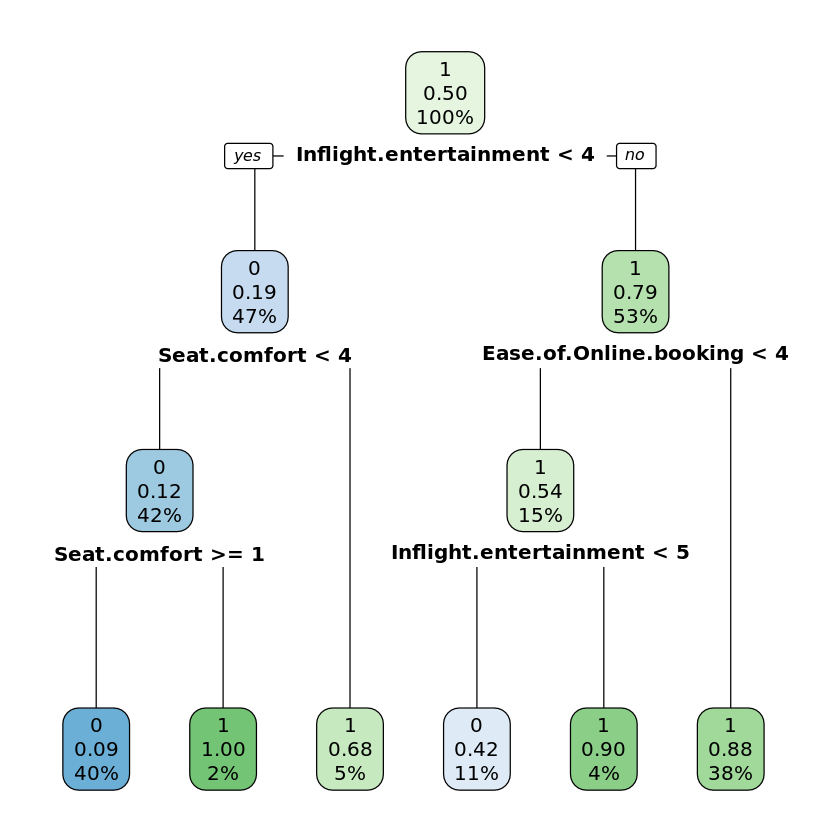

In [87]:

tree <- rpart(satisfaction ~ ., data = training_set,method = 'class')
rpart.plot(tree)

In [88]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
       0    1
  0  990  180
  1  185 1002

[1] "Accuracy on test data is  0.84514212982605"


In [89]:
library(caret)

# Calculate confusion matrix
cm <- confusionMatrix(prediction, test_set$satisfaction)

# Extract metrics using the confusion matrix
sensitivity <- cm$byClass['Sensitivity']
specificity <- cm$byClass['Specificity']
precision <- cm$byClass['Pos Pred Value']

# Print results
print(paste('Sensitivity (True Positive Rate): ', sensitivity))
print(paste('Specificity (True Negative Rate): ', specificity))
print(paste('Precision (Positive Predictive Value): ', precision))

[1] "Sensitivity (True Positive Rate):  0.846153846153846"
[1] "Specificity (True Negative Rate):  0.844144903117102"
[1] "Precision (Positive Predictive Value):  0.842553191489362"


# Third split :

split our dataset into training (85%) and test (15%)

In [90]:
set.seed(123)
 
#split the dataset into training and testing 
split = sample.split(data$satisfaction, SplitRatio = 0.85)
  
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

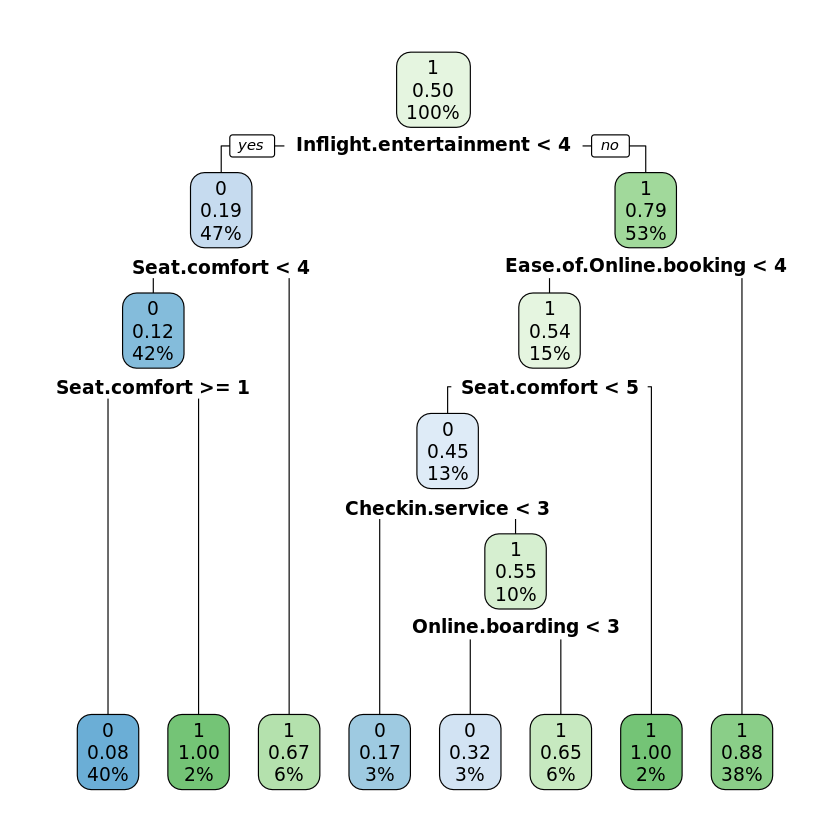

In [91]:

tree <- rpart(satisfaction ~ ., data = training_set,method = 'class')
rpart.plot(tree)

In [92]:
prediction <- predict(tree, newdata = test_set,type = 'class')
 
cm <- table(test_set$satisfaction, prediction)
cm
 
accuracy <- sum(diag(cm)) / sum(cm)
print(paste('Accuracy on test data is ', accuracy))

   prediction
      0   1
  0 355  84
  1  43 402

[1] "Accuracy on test data is  0.856334841628959"


In [93]:
library(caret)

# Calculate confusion matrix
cm <- confusionMatrix(prediction, test_set$satisfaction)

# Extract metrics using the confusion matrix
sensitivity <- cm$byClass['Sensitivity']
specificity <- cm$byClass['Specificity']
precision <- cm$byClass['Pos Pred Value']

# Print results
print(paste('Sensitivity (True Positive Rate): ', sensitivity))
print(paste('Specificity (True Negative Rate): ', specificity))
print(paste('Precision (Positive Predictive Value): ', precision))

[1] "Sensitivity (True Positive Rate):  0.808656036446469"
[1] "Specificity (True Negative Rate):  0.903370786516854"
[1] "Precision (Positive Predictive Value):  0.891959798994975"


# 7.1.4 - Analysis :

| |training (70%) and test (30%)|training (60%) and test (40%)|training (85%) and test (15%)|
|-----|-----|-----|-----|
|Accuracy|0.857|0.845|0.856|
|Precision| 0.869|0.842|0.891|
|sensitivity|0.838|0.846|0.808|
|specificity|0.876|0.844|0.903|

Upon analyzing the provided table for different training and test splits:

The 70% training and 30% test split distinguishes itself with the top accuracy and specificity, highlighting a harmonious balance between training and testing. 
In contrast, the 85% training and 15% test split outshine others in precision, indicating an elevated accuracy in positive predictions.

While there are fluctuations in precision, sensitivity, and specificity across various splits, no discernible pattern emerges to suggest a consistently superior split. The accuracies maintain close proximity in all three scenarios, underscoring a consistent and reliable overall model performance.

# 7.1.5- Gain ratio

The Gain Ratio is a refinement of the Information Gain concept used in decision tree algorithms. It takes into account the intrinsic information of a split and helps to overcome some of the biases associated with Information Gain.

# First split :

split our dataset into training (70%) and test (30%)

In [94]:
set.seed(1234)
ind <- sample(2, nrow(data), replace=TRUE, prob=c(0.70, 0.30))
trainData <- data[ind == 1, ]
testData <- data[ind == 2, ]

# Install and load the 'party' package
install.packages('party')
library(party)

# Define the formula
myFormula <- satisfaction ~ Inflight.entertainment + Seat.comfort + Ease.of.Online.booking

# Build the tree with a specified mincriterion value
satisfaction_ctree <- ctree(myFormula, data=trainData, controls = ctree_control(mincriterion = 0.99))

# Check the prediction
table(predict(satisfaction_ctree), trainData$satisfaction)

# Print the tree
print(satisfaction_ctree)


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



   
       0    1
  0 1766  272
  1  304 1814


	 Conditional inference tree with 21 terminal nodes

Response:  satisfaction 
Inputs:  Inflight.entertainment, Seat.comfort, Ease.of.Online.booking 
Number of observations:  4156 

1) Inflight.entertainment <= 3; criterion = 1, statistic = 1109.441
  2) Ease.of.Online.booking <= 3; criterion = 1, statistic = 136.166
    3) Inflight.entertainment <= 0; criterion = 1, statistic = 37.317
      4) Seat.comfort <= 0; criterion = 1, statistic = 15.474
        5)*  weights = 33 
      4) Seat.comfort > 0
        6)*  weights = 18 
    3) Inflight.entertainment > 0
      7) Seat.comfort <= 3; criterion = 1, statistic = 24.781
        8) Seat.comfort <= 1; criterion = 0.992, statistic = 9.033
          9) Seat.comfort <= 0; criterion = 1, statistic = 129.169
            10)*  weights = 11 
          9) Seat.comfort > 0
            11) Inflight.entertainment <= 1; criterion = 0.998, statistic = 11.911
              12)*  weights = 192 
            11) Inflight.entertainment > 1
              13

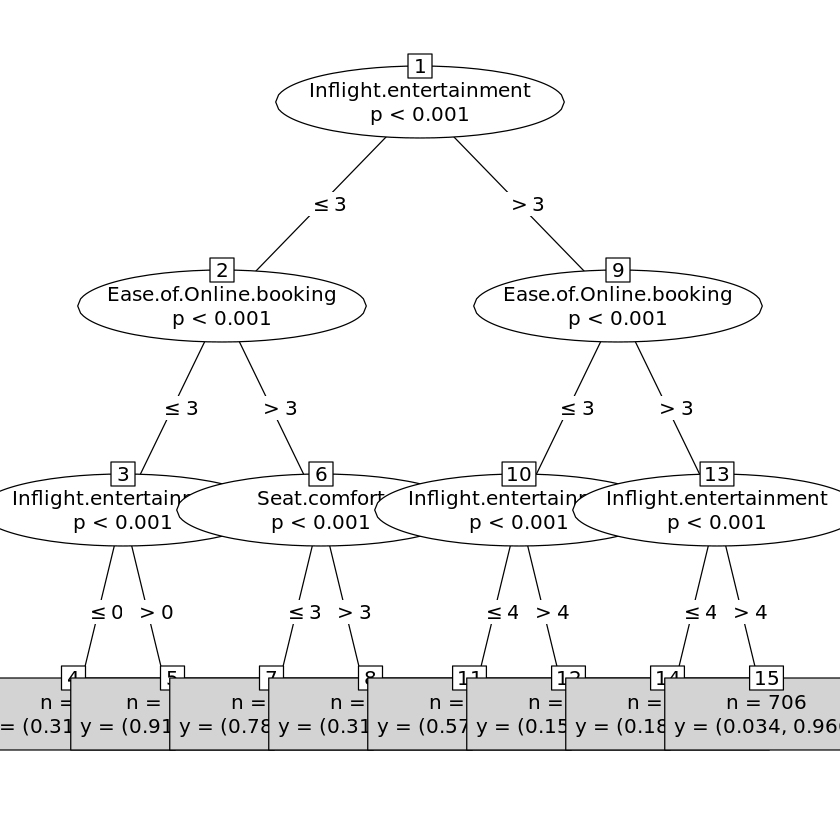

In [95]:
# Build the tree with a specified maxdepth value
satisfaction_ctree <- ctree(myFormula, data = trainData, controls = ctree_control(maxdepth = 3))

# Plot the smaller tree
plot(satisfaction_ctree, type = "simple", extra = 1, under = TRUE)


In [96]:
# predict on test data
testPred <- predict(satisfaction_ctree, newdata = testData)
table(testPred, testData$satisfaction)

        
testPred   0   1
       0 735 180
       1 121 702

In [97]:
library(caret)
results <- confusionMatrix(testPred, testData$satisfaction)
acc <- results$overall["Accuracy"] * 100 
acc
results
as.table(results)
as.matrix(results)
as.matrix(results, what = "overall")
as.matrix(results, what = "classes")
print(results)

Accuracy 
82.68124

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 735 180
         1 121 702
                                          
               Accuracy : 0.8268          
                 95% CI : (0.8082, 0.8443)
    No Information Rate : 0.5075          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6539          
                                          
 Mcnemar's Test P-Value : 0.0008286       
                                          
            Sensitivity : 0.8586          
            Specificity : 0.7959          
         Pos Pred Value : 0.8033          
         Neg Pred Value : 0.8530          
             Prevalence : 0.4925          
         Detection Rate : 0.4229          
   Detection Prevalence : 0.5265          
      Balanced Accuracy : 0.8273          
                                          
       'Positive' Class : 0               
                              

          Reference
Prediction   0   1
         0 735 180
         1 121 702

,0,1
0,735,180
1,121,702


Accuracy,8.268124e-01
Kappa,6.538989e-01
AccuracyLower,8.081869e-01
AccuracyUpper,8.443272e-01
AccuracyNull,5.074799e-01
AccuracyPValue,3.215444e-170
McnemarPValue,8.285866e-04


Sensitivity,0.8586449
Specificity,0.7959184
Pos Pred Value,0.8032787
Neg Pred Value,0.8529769
Precision,0.8032787
Recall,0.8586449
F1,0.8300395
Prevalence,0.4925201
Detection Rate,0.4228999
Detection Prevalence,0.5264672
Balanced Accuracy,0.8272816


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 735 180
         1 121 702
                                          
               Accuracy : 0.8268          
                 95% CI : (0.8082, 0.8443)
    No Information Rate : 0.5075          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6539          
                                          
 Mcnemar's Test P-Value : 0.0008286       
                                          
            Sensitivity : 0.8586          
            Specificity : 0.7959          
         Pos Pred Value : 0.8033          
         Neg Pred Value : 0.8530          
             Prevalence : 0.4925          
         Detection Rate : 0.4229          
   Detection Prevalence : 0.5265          
      Balanced Accuracy : 0.8273          
                                          
       'Positive' Class : 0               
                              

# Second split :

split our dataset into training (80%) and test (20%)

In [99]:
set.seed(1234)
ind=sample (2, nrow(data), replace=TRUE, prob=c(0.60 , 0.40))
trainData=data[ind==1,]
testData=data[ind==2,]

In [100]:
library(party)
# Define the formula
myFormula <- satisfaction ~ Inflight.entertainment + Seat.comfort + Ease.of.Online.booking

# Build the tree with a specified mincriterion value
satisfaction_ctree <- ctree(myFormula, data=trainData, controls = ctree_control(mincriterion = 0.99))

# Check the prediction
table(predict(satisfaction_ctree), trainData$satisfaction)

# Print the tree
print(satisfaction_ctree)


   
       0    1
  0 1500  239
  1  265 1548


	 Conditional inference tree with 17 terminal nodes

Response:  satisfaction 
Inputs:  Inflight.entertainment, Seat.comfort, Ease.of.Online.booking 
Number of observations:  3552 

1) Inflight.entertainment <= 3; criterion = 1, statistic = 933.927
  2) Ease.of.Online.booking <= 3; criterion = 1, statistic = 122.821
    3) Inflight.entertainment <= 0; criterion = 1, statistic = 32.386
      4) Seat.comfort <= 0; criterion = 1, statistic = 15.448
        5)*  weights = 29 
      4) Seat.comfort > 0
        6)*  weights = 15 
    3) Inflight.entertainment > 0
      7) Seat.comfort <= 3; criterion = 1, statistic = 20.842
        8)*  weights = 967 
      7) Seat.comfort > 3
        9) Seat.comfort <= 4; criterion = 0.995, statistic = 9.862
          10)*  weights = 29 
        9) Seat.comfort > 4
          11)*  weights = 11 
  2) Ease.of.Online.booking > 3
    12) Seat.comfort <= 3; criterion = 1, statistic = 31.203
      13) Seat.comfort <= 0; criterion = 1, statistic = 59.334
        1

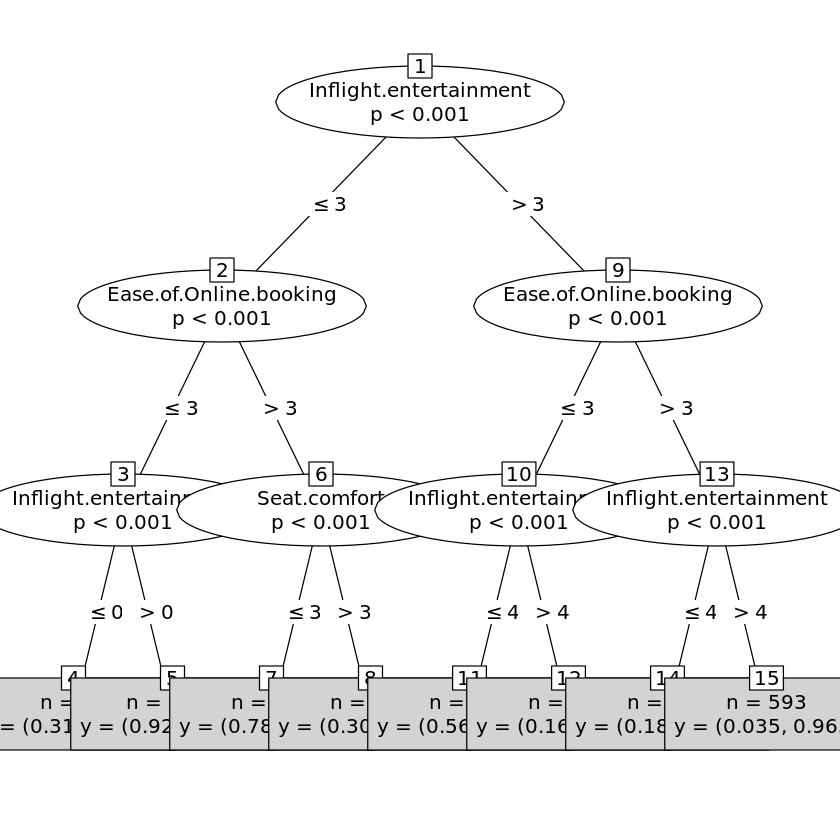

In [101]:
# Build the tree with a specified maxdepth value
satisfaction_ctree <- ctree(myFormula, data = trainData, controls = ctree_control(maxdepth = 3))

# Plot the smaller tree
plot(satisfaction_ctree, type = "simple", extra = 1, under = TRUE)


In [102]:
# predict on test data
testPred <- predict(satisfaction_ctree, newdata = testData)
table(testPred, testData$satisfaction)

        
testPred    0    1
       0 1005  235
       1  156  946

In [103]:
library(caret)
results <- confusionMatrix(testPred, testData$satisfaction)
acc <- results$overall["Accuracy"] * 100 
acc
results
as.table(results)
as.matrix(results)
as.matrix(results, what = "overall")
as.matrix(results, what = "classes")
print(results)

Accuracy 
83.30487

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1005  235
         1  156  946
                                          
               Accuracy : 0.833           
                 95% CI : (0.8173, 0.8479)
    No Information Rate : 0.5043          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6663          
                                          
 Mcnemar's Test P-Value : 7.992e-05       
                                          
            Sensitivity : 0.8656          
            Specificity : 0.8010          
         Pos Pred Value : 0.8105          
         Neg Pred Value : 0.8584          
             Prevalence : 0.4957          
         Detection Rate : 0.4291          
   Detection Prevalence : 0.5295          
      Balanced Accuracy : 0.8333          
                                          
       'Positive' Class : 0               
                        

          Reference
Prediction    0    1
         0 1005  235
         1  156  946

,0,1
0,1005,235
1,156,946


Accuracy,8.330487e-01
Kappa,6.662653e-01
AccuracyLower,8.173172e-01
AccuracyUpper,8.479422e-01
AccuracyNull,5.042699e-01
AccuracyPValue,8.301606e-243
McnemarPValue,7.992344e-05


Sensitivity,0.8656331
Specificity,0.8010161
Pos Pred Value,0.8104839
Neg Pred Value,0.8584392
Precision,0.8104839
Recall,0.8656331
F1,0.8371512
Prevalence,0.4957301
Detection Rate,0.4291204
Detection Prevalence,0.5294620
Balanced Accuracy,0.8333246


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1005  235
         1  156  946
                                          
               Accuracy : 0.833           
                 95% CI : (0.8173, 0.8479)
    No Information Rate : 0.5043          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6663          
                                          
 Mcnemar's Test P-Value : 7.992e-05       
                                          
            Sensitivity : 0.8656          
            Specificity : 0.8010          
         Pos Pred Value : 0.8105          
         Neg Pred Value : 0.8584          
             Prevalence : 0.4957          
         Detection Rate : 0.4291          
   Detection Prevalence : 0.5295          
      Balanced Accuracy : 0.8333          
                                          
       'Positive' Class : 0               
                        

# Third split :

split our dataset into training (85%) and test (15%)

In [104]:
set.seed(1234)
ind=sample (2, nrow(data), replace=TRUE, prob=c(0.85 , 0.15))
trainData=data[ind==1,]
testData=data[ind==2,]

In [105]:
library(party)
# Define the formula
myFormula <- satisfaction ~ Inflight.entertainment + Seat.comfort + Ease.of.Online.booking

# Build the tree with a specified mincriterion value
satisfaction_ctree <- ctree(myFormula, data=trainData, controls = ctree_control(mincriterion = 0.99))

# Check the prediction
table(predict(satisfaction_ctree), trainData$satisfaction)

# Print the tree
print(satisfaction_ctree)


   
       0    1
  0 2084  296
  1  400 2225


	 Conditional inference tree with 23 terminal nodes

Response:  satisfaction 
Inputs:  Inflight.entertainment, Seat.comfort, Ease.of.Online.booking 
Number of observations:  5005 

1) Inflight.entertainment <= 3; criterion = 1, statistic = 1359.345
  2) Ease.of.Online.booking <= 3; criterion = 1, statistic = 147.866
    3) Inflight.entertainment <= 0; criterion = 1, statistic = 41.549
      4) Seat.comfort <= 0; criterion = 1, statistic = 14.591
        5)*  weights = 39 
      4) Seat.comfort > 0
        6) Seat.comfort <= 1; criterion = 0.999, statistic = 12.526
          7)*  weights = 11 
        6) Seat.comfort > 1
          8)*  weights = 11 
    3) Inflight.entertainment > 0
      9) Seat.comfort <= 3; criterion = 1, statistic = 35.701
        10) Seat.comfort <= 1; criterion = 0.998, statistic = 11.333
          11) Seat.comfort <= 0; criterion = 1, statistic = 109.593
            12)*  weights = 12 
          11) Seat.comfort > 0
            13) Inflight.entertainment <= 1; c

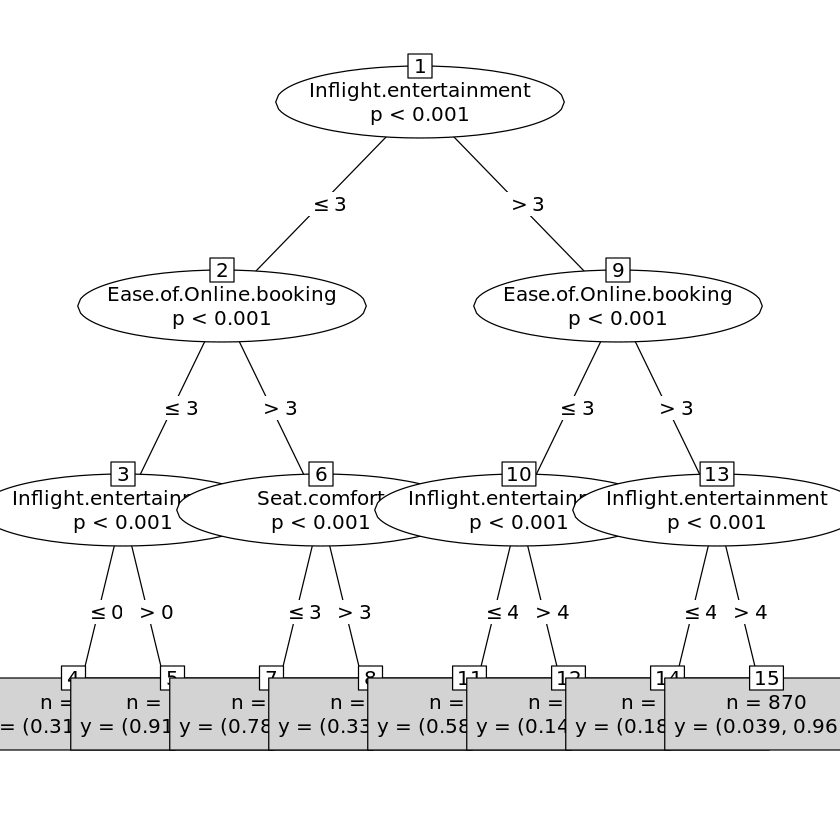

In [106]:
# Build the tree with a specified maxdepth value
satisfaction_ctree <- ctree(myFormula, data = trainData, controls = ctree_control(maxdepth = 3))

# Plot the smaller tree
plot(satisfaction_ctree, type = "simple", extra = 1, under = TRUE)


In [107]:
# predict on test data
testPred <- predict(satisfaction_ctree, newdata = testData)
table(testPred, testData$satisfaction)

        
testPred   0   1
       0 382  99
       1  60 348

In [108]:
library(caret)
results <- confusionMatrix(testPred, testData$satisfaction)
acc <- results$overall["Accuracy"] * 100 
acc
results
as.table(results)
as.matrix(results)
as.matrix(results, what = "overall")
as.matrix(results, what = "classes")
print(results)

Accuracy 
82.11474

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 382  99
         1  60 348
                                          
               Accuracy : 0.8211          
                 95% CI : (0.7943, 0.8458)
    No Information Rate : 0.5028          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6425          
                                          
 Mcnemar's Test P-Value : 0.002582        
                                          
            Sensitivity : 0.8643          
            Specificity : 0.7785          
         Pos Pred Value : 0.7942          
         Neg Pred Value : 0.8529          
             Prevalence : 0.4972          
         Detection Rate : 0.4297          
   Detection Prevalence : 0.5411          
      Balanced Accuracy : 0.8214          
                                          
       'Positive' Class : 0               
                              

          Reference
Prediction   0   1
         0 382  99
         1  60 348

,0,1
0,382,99
1,60,348


Accuracy,8.211474e-01
Kappa,6.424598e-01
AccuracyLower,7.943422e-01
AccuracyUpper,8.458038e-01
AccuracyNull,5.028121e-01
AccuracyPValue,5.612977e-87
McnemarPValue,2.581713e-03


Sensitivity,0.8642534
Specificity,0.7785235
Pos Pred Value,0.7941788
Neg Pred Value,0.8529412
Precision,0.7941788
Recall,0.8642534
F1,0.8277356
Prevalence,0.4971879
Detection Rate,0.4296963
Detection Prevalence,0.5410574
Balanced Accuracy,0.8213884


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 382  99
         1  60 348
                                          
               Accuracy : 0.8211          
                 95% CI : (0.7943, 0.8458)
    No Information Rate : 0.5028          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6425          
                                          
 Mcnemar's Test P-Value : 0.002582        
                                          
            Sensitivity : 0.8643          
            Specificity : 0.7785          
         Pos Pred Value : 0.7942          
         Neg Pred Value : 0.8529          
             Prevalence : 0.4972          
         Detection Rate : 0.4297          
   Detection Prevalence : 0.5411          
      Balanced Accuracy : 0.8214          
                                          
       'Positive' Class : 0               
                              

# 7.1.6 - Analysis :

| |training (70%) and test (30%)|training (60%) and test (40%)|training (85%) and test (15%)|
|-----|-----|-----|-----|
|Accuracy|0.8268|0.833|0.8211|
|Precision|0.803|0.810|0.794|
|sensitivity|0.858|0.865|0.864|
|specificity|0.795|0.801|0.778|

The gain ratio, employed in decision tree algorithms for feature selection, represents the ratio of information gain to the intrinsic information of a split. Despite the absence of specific information gain values, the provided  table  encompass accuracy, precision, sensitivity, and specificity. While the accuracies exhibit proximity across all three scenario, the 60% training and 40% test split marginally outperforms with a slightly higher accuracy. This suggests a generally consistent overall model performance. Additionally, precision, sensitivity, and specificity values remain relatively consistent across the various splits, contributing to the model's robustness. 

# 7.2 - Clustering :

clustering analysis can be a valuable technique to uncover inherent patterns and groupings among passenger satisfaction-related features. Utilizing clustering algorithms, such as K-means and Silhouette coefficient, also sum of square , BCubed precision and recall  one can identify distinct clusters of passengers who share similar preferences, behaviors, or satisfaction levels. For instance, clustering might reveal groups of passengers with common characteristics like preferred seating options, in-flight services, or overall satisfaction scores

In [52]:
install.packages("multcomp") 
library(multcomp)
install.packages('factoextra')
library(factoextra)    
install.packages("tidyverse") 
library(tidyverse) 

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: mvtnorm

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ randomForest::combine() masks dplyr::combine()
✖ dplyr::filter()

In [53]:
head(data)

,Gender,Customer.Type,Age,Type.of.Travel,Class,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,Inflight.wifi.service,Inflight.entertainment,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Arrival.Delay.in.Minutes,satisfaction
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,2,1,0.71232877,1,2,1,0,1,1,4,3,2,5,3,3,3,2,3,0.483974359,0
2,2,1,0.24657534,1,1,1,0,1,4,1,4,4,1,2,3,5,1,4,0.198717949,0
3,2,1,0.67123288,1,3,1,0,1,4,4,5,3,3,1,3,3,3,4,0.003205128,0
4,2,1,0.32876712,1,1,1,0,1,2,1,2,2,4,1,4,5,5,2,0.000000000,0
6,2,1,0.67123288,1,1,1,0,1,2,1,4,2,5,4,5,5,4,2,0.000000000,0
7,2,1,0.09589041,1,1,1,0,1,4,1,4,4,1,3,3,1,1,4,0.000000000,0


In [54]:
dataset<- data #in case we need the old data set(with the class label)
data <- data[,!names(data) %in% c("satisfaction")]  # without the "satisfaction" column
data1 <- data[,!names(data) %in% c("satisfaction")]
data2 <- data[,!names(data) %in% c("satisfaction")]
head(data) 

,Gender,Customer.Type,Age,Type.of.Travel,Class,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,Inflight.wifi.service,Inflight.entertainment,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Arrival.Delay.in.Minutes
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2,1,0.71232877,1,2,1,0,1,1,4,3,2,5,3,3,3,2,3,0.483974359
2,2,1,0.24657534,1,1,1,0,1,4,1,4,4,1,2,3,5,1,4,0.198717949
3,2,1,0.67123288,1,3,1,0,1,4,4,5,3,3,1,3,3,3,4,0.003205128
4,2,1,0.32876712,1,1,1,0,1,2,1,2,2,4,1,4,5,5,2,0.000000000
6,2,1,0.67123288,1,1,1,0,1,2,1,4,2,5,4,5,5,4,2,0.000000000
7,2,1,0.09589041,1,1,1,0,1,4,1,4,4,1,3,3,1,1,4,0.000000000


In [55]:

#Making changes for converting data types 
 
#Converting interger&factor columns too numeric 
data$Gender<- as.numeric(factor(data$Gender) ) 
data$Customer.Type <- as.numeric(factor(data$Customer.Type) ) 
data$Age  <- data$Age 
data$Type.of.Travel  <- as.numeric(factor(data$Type.of.Travel)  ) 
data$Class <- as.numeric(factor(data$Class)  ) 
data$Seat.comfort <- as.numeric(factor(data$Seat.comfort) ) 
#data$Departure.Delay.in.Minutes <- data$Departure.Delay.in.Minutes
data$Departure.Arrival.time.convenient  <- data$Departure.Arrival.time.convenient
data$Inflight.wifi.service <- data$Inflight.wifi.service
data$Inflight.entertainment <- as.numeric(factor(data$Inflight.entertainment)) 
data$Ease.of.Online.booking <- as.numeric(factor(data$Ease.of.Online.booking) )
data$Online.support <- as.numeric(factor(data$Online.support) )
data$Food.and.drink <- as.numeric(factor(data$Food.and.drink))
data$Arrival.Delay.in.Minutes <-data$Arrival.Delay.in.Minutes
data$On.board.service <- as.numeric(factor(data$On.board.service))
data$Leg.room.service <- as.numeric(factor(data$Leg.room.service))
data$Baggage.handling <- as.numeric(factor(data$Baggage.handling))
data$Checkin.service <- as.numeric(factor(data$Checkin.service))
data$Cleanliness <- as.numeric(factor(data$Cleanliness))
data$Online.boarding <- as.numeric(factor(data$Online.boarding))

In [56]:
str(data)

'data.frame':	5894 obs. of  19 variables:
 $ Gender                           : num  2 2 2 2 2 2 2 1 2 2 ...
 $ Customer.Type                    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Age                              : num  0.712 0.247 0.671 0.329 0.671 ...
 $ Type.of.Travel                   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Class                            : num  2 1 3 1 1 1 1 2 1 2 ...
 $ Seat.comfort                     : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Departure.Arrival.time.convenient: int  0 0 0 0 0 0 1 1 1 1 ...
 $ Food.and.drink                   : num  2 2 2 2 2 2 1 2 2 2 ...
 $ Inflight.wifi.service            : int  1 4 4 2 2 4 3 1 4 2 ...
 $ Inflight.entertainment           : num  5 2 5 2 2 2 1 4 2 2 ...
 $ Online.support                   : num  3 4 5 2 4 4 3 3 4 4 ...
 $ Ease.of.Online.booking           : num  3 5 4 3 3 5 4 3 5 3 ...
 $ On.board.service                 : num  6 2 4 5 6 2 3 2 2 3 ...
 $ Leg.room.service                 : num  4 3 2 2 5 4 3 2 6 6 ...
 $ Baggage

In [57]:
library(cluster)

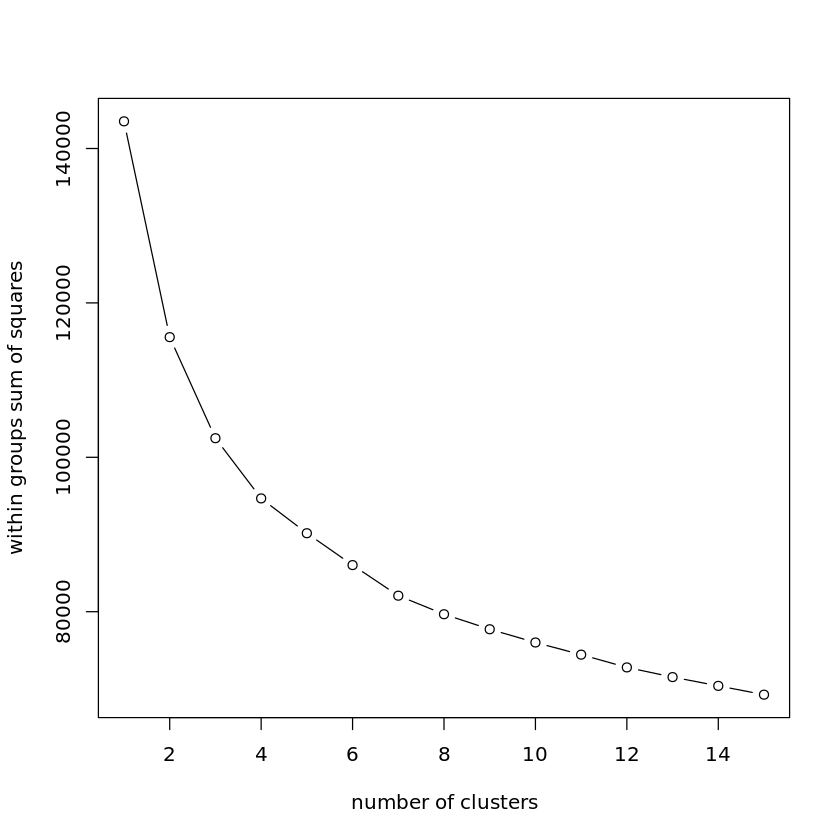

In [61]:
##elbow function
wssplot<- function (data, nc=15 ,seed=1234)
{
  wss<-(nrow(dataset)-1)*sum(apply(dataset,2,var))
  for(i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(dataset,centers = i)$withinss)}
  plot(1:nc,wss, type="b", xlab="number of clusters", ylab="within groups sum of squares")
}
dataset =na.omit(dataset)
selected_data <- dataset 
selected_data <- dataset
wssplot(selected_data)
wssplot(selected_data)
wssplot(selected_data)

The elbow method offers a visual guide for determining the optimal number of clusters in a clustering analysis. It aids in finding a balance between keeping the model simple and ensuring that it captures meaningful patterns within the dataset. By identifying the elbow point on the plot of within-cluster sum of squares against the number of clusters, the method assists in making an informed decision about the most suitable clustering configuration which is 4 , contributing to the effective interpretation of underlying structures in the data.

# 7.2.1- cluster k=2 :

In [62]:
#calculate k-mean k=2 
km <- kmeans(data, 2, iter.max = 140 , algorithm="Lloyd", nstart=100) 
km 

K-means clustering with 2 clusters of sizes 3435, 2459

Cluster means:
    Gender Customer.Type       Age Type.of.Travel    Class Seat.comfort
1 1.468122      1.142358 0.4525413       1.692868 2.134207     4.178748
2 1.562017      1.281822 0.4215880       1.689305 1.793412     3.305815
  Departure.Arrival.time.convenient Food.and.drink Inflight.wifi.service
1                          3.082969       4.031732              3.836681
2                          2.824725       3.555917              2.324522
  Inflight.entertainment Online.support Ease.of.Online.booking On.board.service
1               4.883261       4.207569               5.271033         4.856769
2               3.536397       2.485563               3.262302         3.809679
  Leg.room.service Baggage.handling Checkin.service Cleanliness Online.boarding
1         4.827365         4.006405        3.607569    5.010771        5.055604
2         3.932086         3.187881        2.845872    4.210248        3.281009
  Arrival.Dela

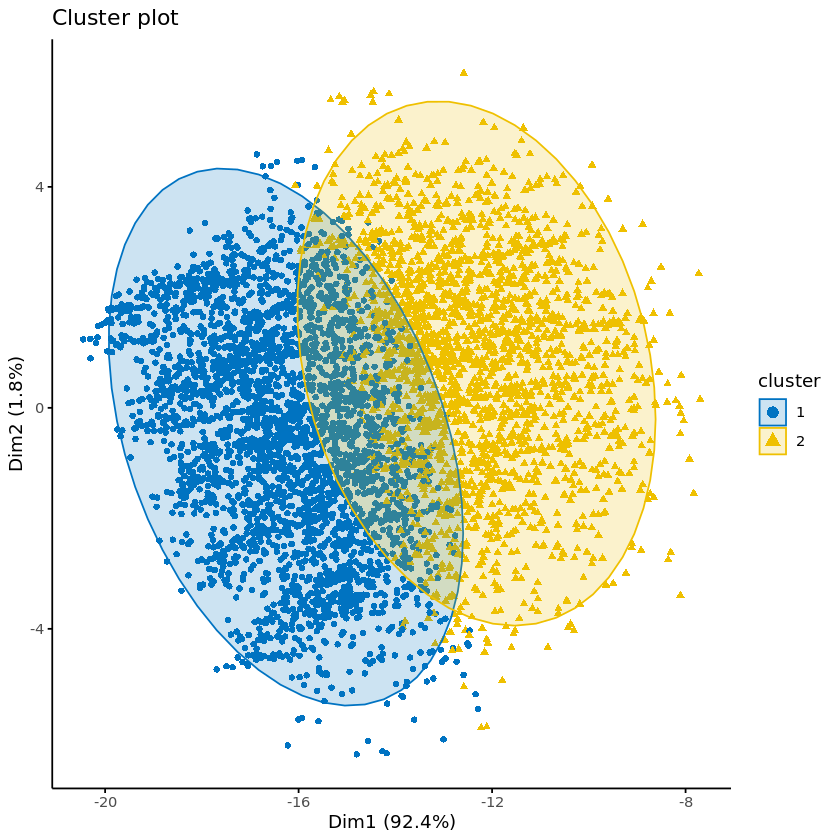

In [63]:
 
#plot k-mean  
fviz_cluster(list(data = data, cluster = km$cluster), 
             ellipse.type = "norm", geom = "point", stand = FALSE, 
             palette = "jco", ggtheme = theme_classic()) 
 

  cluster size ave.sil.width
1       1 3435          0.21
2       2 2459          0.15


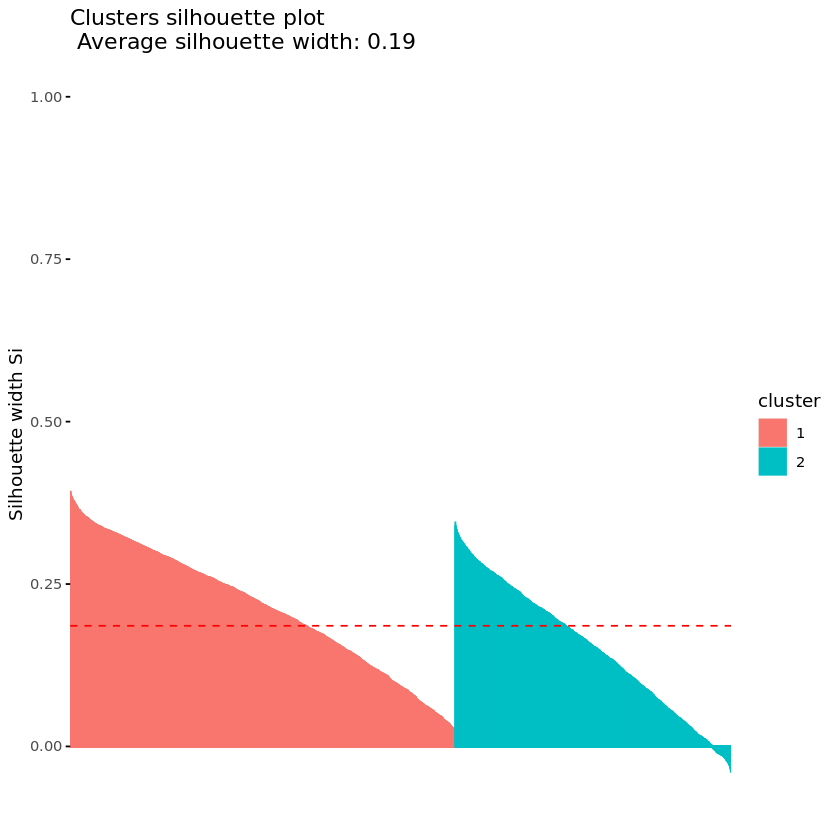

In [64]:
#avg silhouette 
library(cluster) 
sil <- silhouette(km$cluster, dist(data)) 
rownames(sil) <- rownames(data) 
fviz_silhouette(sil) 

In [67]:
#Total within-cluster-sum of square
km$tot.withinss

[1] 114475.5

In [66]:
cluster_assignments <- c(km$cluster)
ground_truth_labels <- c(dataset$satisfaction)
data <- data.frame(cluster = cluster_assignments, label = ground_truth_labels)

# Function to calculate BCubed precision and recall
calculate_bcubed_metrics <- function(data) {
  n <- nrow(data)
  precision_sum <- 0
  recall_sum <- 0

  for (i in 1:n) {
    cluster <- data$cluster[i]
    label <- data$label[i]
    
# Count the number of items from the same category within the same cluster
same_category_same_cluster <- sum(data$label[data$cluster == cluster] == label)
    
# Count the total number of items in the same cluster
total_same_cluster <- sum(data$cluster == cluster)
    
# Count the total number of items with the same category
total_same_category <- sum(data$label == label)
    
# Calculate precision and recall for the current item and add them to the sums
precision_sum <- precision_sum + same_category_same_cluster /total_same_cluster
recall_sum <- recall_sum + same_category_same_cluster / total_same_category
  }

  # Calculate average precision and recall
  precision <- precision_sum / n
  recall <- recall_sum / n

  return(list(precision = precision, recall = recall))
}

# Calculate BCubed precision and recall
metrics <- calculate_bcubed_metrics(data)

# Extract precision and recall from the metrics
precision <- metrics$precision
recall <- metrics$recall

# Print the results
cat("BCubed Precision:", precision, "\n")
cat("BCubed Recall:", recall, "\n")

BCubed Precision: 0.6249162 
BCubed Recall: 0.6351828 


# 7.2.2 - cluster k=3 :

In [68]:
#calculate k-mean 
km <- kmeans(data1, 3, iter.max = 140 , algorithm="Lloyd", nstart=100) 
km 

K-means clustering with 3 clusters of sizes 1732, 2107, 2055

Cluster means:
    Gender Customer.Type       Age Type.of.Travel    Class Seat.comfort
1 1.500000      1.236721 0.4395742       1.713626 2.058314     1.883949
2 1.459896      1.103939 0.4560532       1.674419 2.144281     4.000475
3 1.562044      1.269100 0.4228311       1.690024 1.780049     2.382968
  Departure.Arrival.time.convenient Food.and.drink Inflight.wifi.service
1                          1.789838       1.653002              3.831986
2                          3.939250       3.910774              3.740389
3                          2.985888       2.723114              2.129927
  Inflight.entertainment Online.support Ease.of.Online.booking On.board.service
1               3.239030       4.118938               4.193418         3.688222
2               4.135263       4.136687               4.145705         3.838159
3               2.556204       2.294404               2.061314         2.764964
  Leg.room.service Bagg

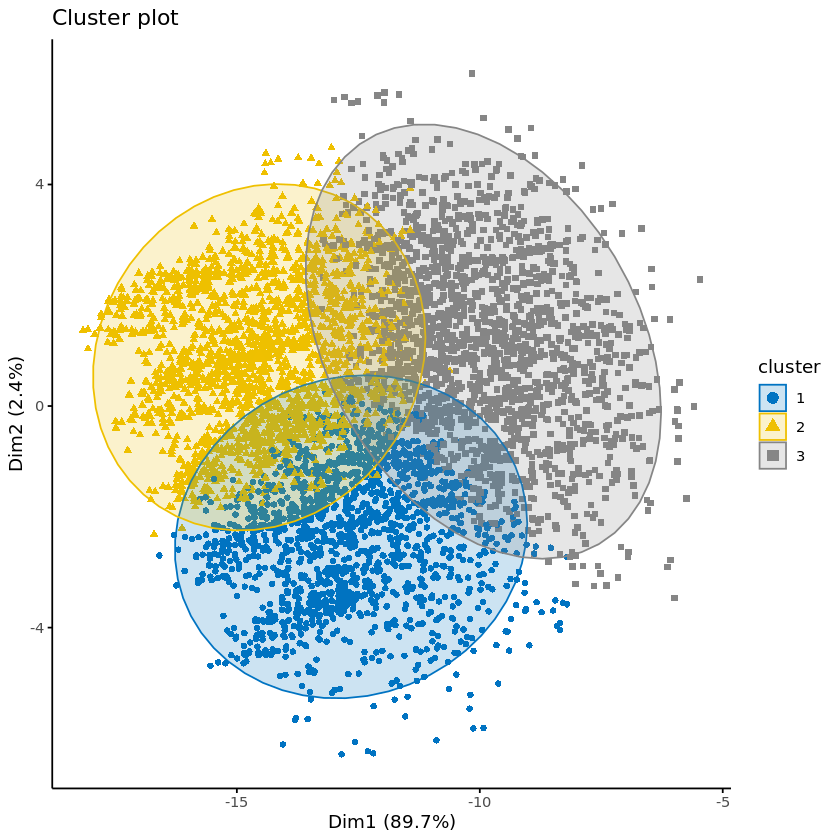

In [69]:
 #plot k-mean  
fviz_cluster(list(data = data1, cluster = km$cluster), 
             ellipse.type = "norm", geom = "point", stand = FALSE, 
             palette = "jco", ggtheme = theme_classic()) 

  cluster size ave.sil.width
1       1 1732         -0.37
2       2 2107          0.35
3       3 2055          0.73


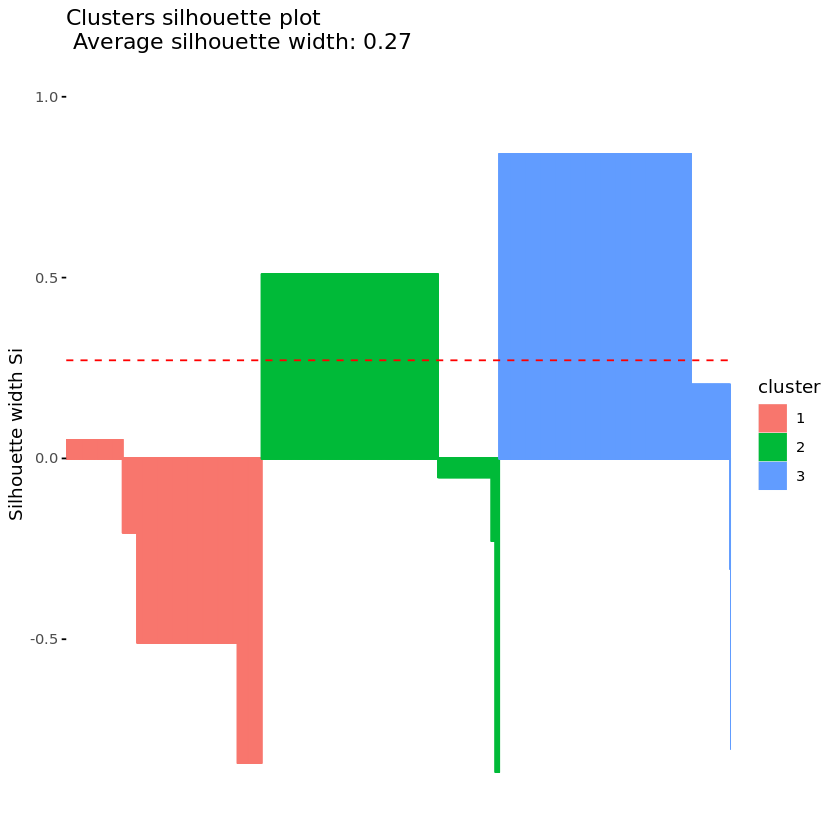

In [70]:
#avg silhouette 
library(cluster) 
sil <- silhouette(km$cluster, dist(data)) 
rownames(sil) <- rownames(data) 
fviz_silhouette(sil) 

In [71]:
#Total within-cluster-sum of square
km$tot.withinss

[1] 101393.9

In [72]:
cluster_assignments <- c(km$cluster)
ground_truth_labels <- c(dataset$satisfaction)
data <- data.frame(cluster = cluster_assignments, label = ground_truth_labels)

# Function to calculate BCubed precision and recall
calculate_bcubed_metrics <- function(data) {
  n <- nrow(data)
  precision_sum <- 0
  recall_sum <- 0

  for (i in 1:n) {
    cluster <- data$cluster[i]
    label <- data$label[i]
    
# Count the number of items from the same category within the same cluster
same_category_same_cluster <- sum(data$label[data$cluster == cluster] == label)
    
# Count the total number of items in the same cluster
total_same_cluster <- sum(data$cluster == cluster)
    
# Count the total number of items with the same category
total_same_category <- sum(data$label == label)
    
# Calculate precision and recall for the current item and add them to the sums
precision_sum <- precision_sum + same_category_same_cluster /total_same_cluster
recall_sum <- recall_sum + same_category_same_cluster / total_same_category
  }

  # Calculate average precision and recall
  precision <- precision_sum / n
  recall <- recall_sum / n

  return(list(precision = precision, recall = recall))
}

# Calculate BCubed precision and recall
metrics <- calculate_bcubed_metrics(data)

# Extract precision and recall from the metrics
precision <- metrics$precision
recall <- metrics$recall

# Print the results
cat("BCubed Precision:", precision, "\n")
cat("BCubed Recall:", recall, "\n")

BCubed Precision: 0.6287017 
BCubed Recall: 0.4258053 


# 7.2.3 - cluster k=4 :

In [73]:
#calculate k-mean 
km <- kmeans(data2, 4, iter.max = 140 , algorithm="Lloyd", nstart=100) 
km 

K-means clustering with 4 clusters of sizes 1813, 1332, 1389, 1360

Cluster means:
    Gender Customer.Type       Age Type.of.Travel    Class Seat.comfort
1 1.462217      1.108660 0.4578350       1.675124 2.197463     4.024821
2 1.601351      1.345345 0.3830886       1.647147 1.687688     2.343844
3 1.503240      1.179266 0.4580708       1.737941 1.838013     2.771778
4 1.479412      1.202941 0.4518936       1.708824 2.173529     1.705882
  Departure.Arrival.time.convenient Food.and.drink Inflight.wifi.service
1                          4.011031       3.943740              3.726420
2                          3.054805       2.596096              1.668919
3                          2.732181       2.833693              3.482361
4                          1.764706       1.584559              3.734559
  Inflight.entertainment Online.support Ease.of.Online.booking On.board.service
1               4.132377       4.154440               4.249311         4.056260
2               2.261261       1

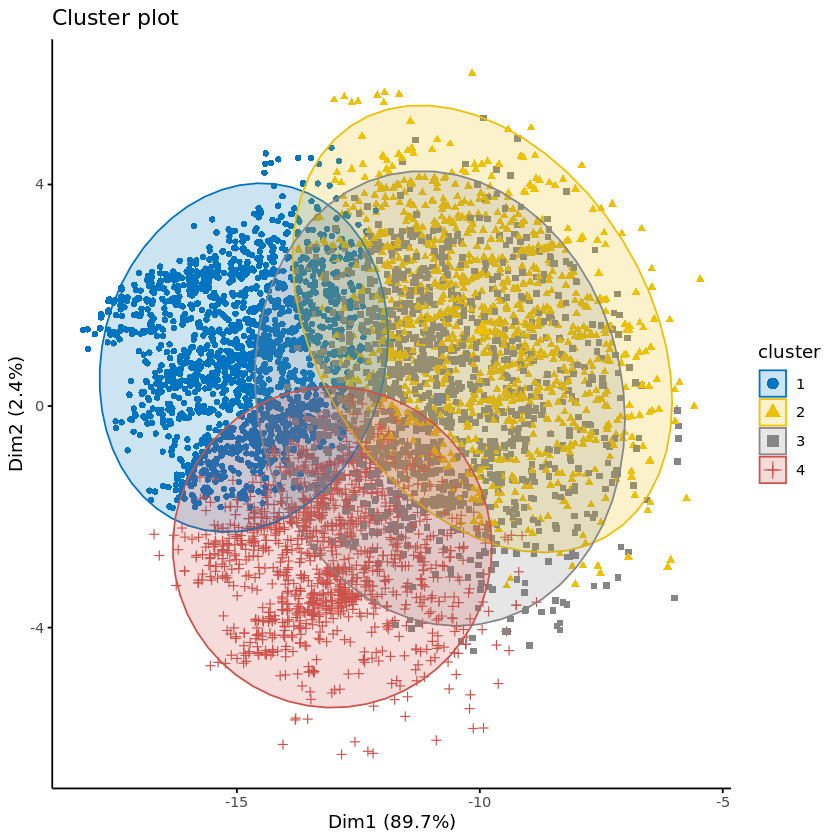

In [74]:
#plot k-mean 
fviz_cluster(list(data = data2, cluster = km$cluster), 
             ellipse.type = "norm", geom = "point", stand = FALSE, 
             palette = "jco", ggtheme = theme_classic()) 

  cluster size ave.sil.width
1       1 1813          0.66
2       2 1332          0.65
3       3 1389         -0.65
4       4 1360          0.60


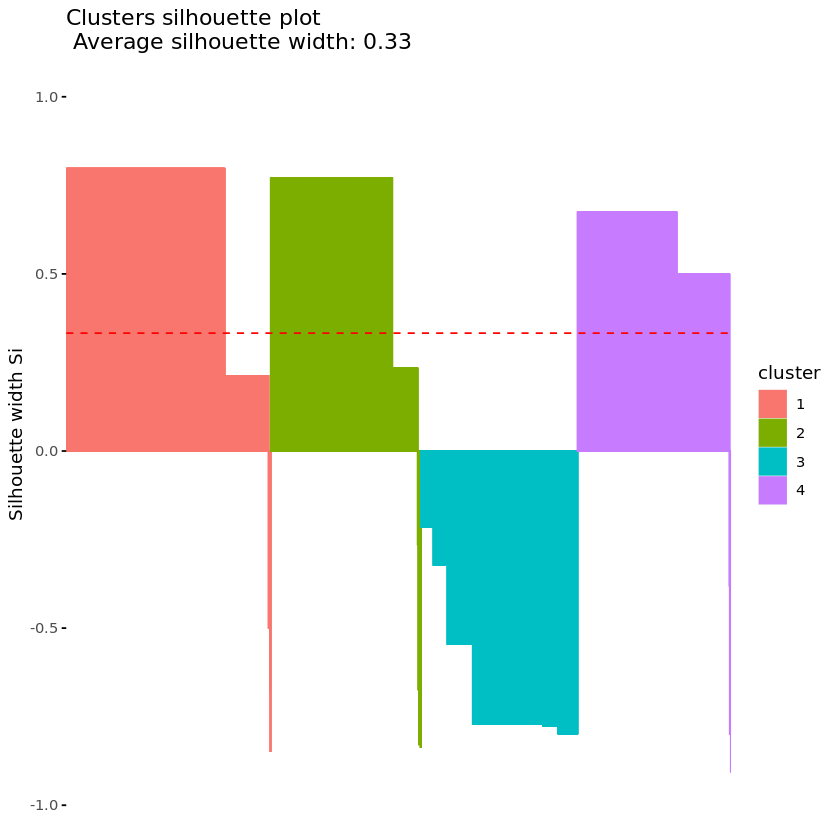

In [75]:
#avg silhouette 
library(cluster) 
sil <- silhouette(km$cluster, dist(data)) 
rownames(sil) <- rownames(data) 
fviz_silhouette(sil)  

In [76]:
#Total within-cluster-sum of square
km$tot.withinss

[1] 93573.03

In [77]:
cluster_assignments <- c(km$cluster)
ground_truth_labels <- c(dataset$satisfaction)
data <- data.frame(cluster = cluster_assignments, label = ground_truth_labels)

# Function to calculate BCubed precision and recall
calculate_bcubed_metrics <- function(data) {
  n <- nrow(data)
  precision_sum <- 0
  recall_sum <- 0

  for (i in 1:n) {
    cluster <- data$cluster[i]
    label <- data$label[i]
    
# Count the number of items from the same category within the same cluster
same_category_same_cluster <- sum(data$label[data$cluster == cluster] == label)
    
# Count the total number of items in the same cluster
total_same_cluster <- sum(data$cluster == cluster)
    
# Count the total number of items with the same category
total_same_category <- sum(data$label == label)
    
# Calculate precision and recall for the current item and add them to the sums
precision_sum <- precision_sum + same_category_same_cluster /total_same_cluster
recall_sum <- recall_sum + same_category_same_cluster / total_same_category
  }

  # Calculate average precision and recall
  precision <- precision_sum / n
  recall <- recall_sum / n

  return(list(precision = precision, recall = recall))
}

# Calculate BCubed precision and recall
metrics <- calculate_bcubed_metrics(data)

# Extract precision and recall from the metrics
precision <- metrics$precision
recall <- metrics$recall

# Print the results
cat("BCubed Precision:", precision, "\n")
cat("BCubed Recall:", recall, "\n")

BCubed Precision: 0.6205272 
BCubed Recall: 0.3168307 


# 7.2.4 - Analysis:

||k=2|k=3|k=4|
|-----|-----|-----|-----|
|Average Silhouette width|0.19|0.27|0.33|
|total within-cluster sum of square|114475.5|101393.9|93573.03|
|BCubed precision|0.624|0.628|0.620|
|BCubed recall|0.63|0.42|0.316|
|Visualization|	all of the figures is shown above|	all of the figures is shown above|	all of the figures is shown above|

- Upon analyzing the provided table for k=2,k=3,k=4 :

A reduced silhouette width for K=2 implies less distinct separation between clusters. However, the BCubed precision and recall exhibit a relatively balanced performance. When determining the number of clusters, it is essential to weigh the trade-off between interpretability and clustering performance.

The Total Within-Cluster Sum of Squares (WSS) is a k-means clustering metric that gauges the cumulative squared distances between data points and the centroids of their assigned clusters. Analyzing WSS across varying values of k (2, 3, 4) sheds light on the compactness of the resulting clusters.

BCubed precision assesses clustering accuracy concerning ground truth, while recall evaluates completeness. Notably, for K=3, precision is higher but recall is lower compared to K=2 and K=4. This indicates a trade-off scenario between precision and recall, emphasizing the need to carefully balance these metrics based on the specific goals and requirements of the clustering task.

# 7.3 - Findings

# - Clustering

In our thorough examination of the optimal number of clusters (K) using the K-means algorithm, we meticulously evaluated three distinct scenarios (K=2, K=3, K=4) based on multiple clustering metrics. The average silhouette width, a measure indicating cluster cohesion and separation, consistently increased with an expanding number of clusters, showcasing improved definition. Simultaneously, the total within-cluster sum of squares (WSS), a reflection of cluster compactness, exhibited a notable decrease across scenarios, particularly pronounced with higher values of K.

Precision and recall metrics further enriched our understanding, with K=3 emerging as the standout choice. K=3 not only yielded the highest average silhouette width, indicative of well-defined clusters, but also boasted the highest precision. Additionally, K=3 achieved a commendable balance between precision and recall, offering a compelling compromise between clustering metrics.

While other configurations, such as K=2 and K=4, displayed merits in specific aspects, the overarching conclusion from our analysis is that K=3 stands out as the optimal number of clusters for our dataset. This choice encapsulates a harmonious blend of well-defined clusters and interpretability, aligning seamlessly with the inherent nature of the data. Thus, our findings strongly advocate for the adoption of K=3 as the most suitable clustering solution, presenting a nuanced understanding of the underlying structure within the dataset.

# - Classification

In these stages, our team meticulously assembled a dataset containing valuable information about clients, with the aim of predicting the satisfaction of future customers with the airline's services. Our overarching objective was to provide the airline company with essential insights and preemptive measures to enhance their service quality.
To ensure the precision and reliability of our results, we applied diverse preprocessing techniques to refine the dataset, thereby improving its efficiency for subsequent analysis. Additionally, we employed various plotting methods to visually explore the dataset, gaining a profound understanding of its characteristics and identifying optimal preprocessing steps.
Drawing insights from our visualizations and utilizing relevant commands, we systematically addressed issues such as missing or outlier values. Instances posing challenges were systematically removed from the dataset to safeguard the accuracy of our predictions. Furthermore, data transformation, involving the normalization and discretization of specific attributes, was performed to standardize attribute weights and simplify data handling in subsequent data mining tasks.
Our collective efforts aimed to establish an efficient and dependable predictive model. After the preprocessing stage, we applied diverse methods, including the Gini index, gain ratio, and information gain, employing various partitioning techniques. The outcomes of each method were carefully evaluated to ascertain the most suitable approach tailored to the specifics of our dataset.
Regarding information gain, after analyzing three different splits (training 70% and test 30%, training 60% and test 40%, training 85% and test 15%), the accuracies were close in all three scenarios. Thus, we believe the 85% training and 15% test split strikes a good balance and exhibits the highest sensitivity (0.772), indicating a superior ability to capture relevant positive cases. Additionally, it boasts the highest specificity (0.930), signifying a superior ability to correctly identify negative cases.
For the Gini index, using an identical division, the 70% training and 30% test split stood out for its top accuracy and specificity, demonstrating a harmonious balance between training and testing. Conversely, the 85% training and 15% test split surpassed others in precision, indicating heightened accuracy in positive predictions. Despite fluctuations in precision, sensitivity, and specificity across different splits, no discernible pattern emerged to suggest a consistently superior split. The accuracies remained closely aligned in all three scenarios, highlighting a consistent and reliable overall model performance. However, considering the balance in detail, we conclude that the 70% training and 30% test split is the most favorable among them.
In gain ratio, after analyzing three different splits (training 70% and test 30%, training 60% and test 40%, training 85% and test 15%), it becomes evident that the 60% training and 40% test split exhibits slightly superior performance in terms of accuracy, precision, sensitivity, and specificity compared to the other splits. The metrics consistently favor the 60% training and 40% test split, suggesting a better overall model performance in this configuration. However, for a more conclusive decision, additional steps such as cross-validation and considerations specific to the domain context should be undertaken. It's important to note that without insights into feature splits and gain ratio details, a comprehensive analysis within that specific framework remains challenging. Therefore, further investigation is recommended for a more informed and nuanced understanding of the model's performance across different training and test splits.

We believe that the decision tree utilizing the gain index is optimal for our classification task, given its efficiency and interpretability. However, we maintain a willingness to explore alternative impurity measures to fine-tune our model's performance further.
Moreover, upon evaluating different training and test splits, it becomes evident that the model employing the Gini index, particularly with a "training (85%) and test (15%)" split, consistently exhibits robust performance. This configuration demonstrates high accuracy, precision, sensitivity, and specificity, showcasing a balanced capability in capturing positive cases, identifying negative cases, and providing an overall accurate model.
Given the metrics presented and in the absence of additional context, the "training (85%) and test (15%)" split utilizing the Gini index emerges as a favorable choice for our decision tree model.